
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

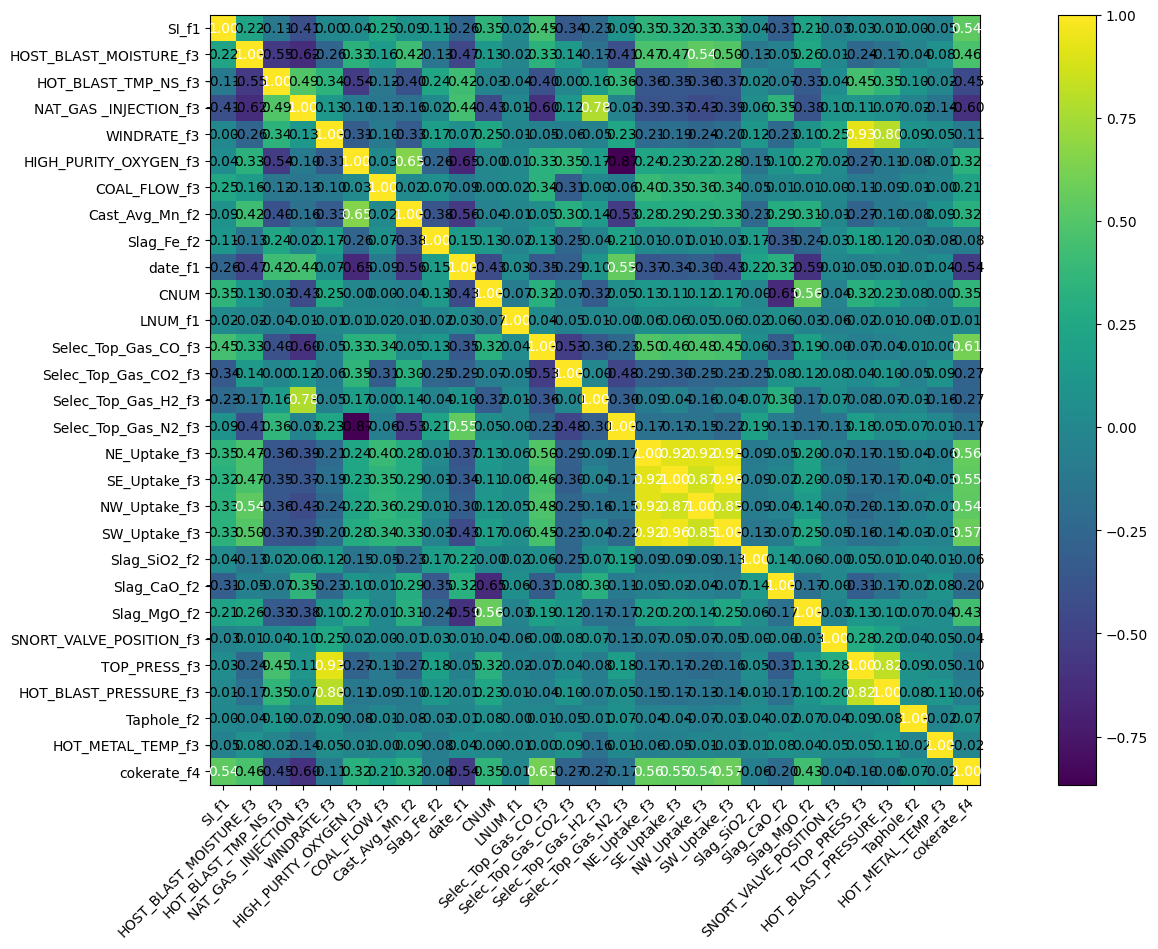

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

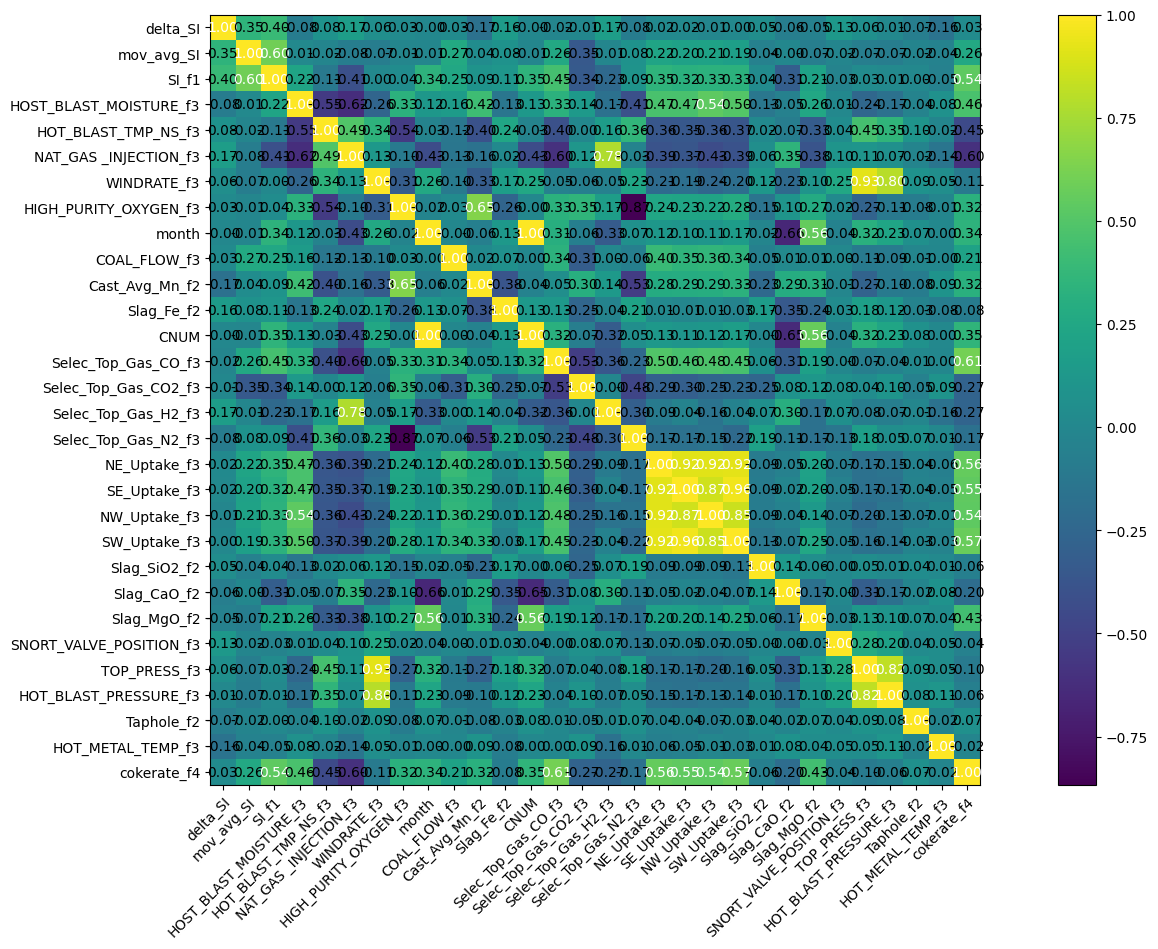

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:
all_real_si_400to500 = []
all_pred_si_400to500 = []

all_real_si_300to500 = []
all_pred_si_300to500 = []

all_real_si_200to500 = []
all_pred_si_200to500 = []

all_real_si_100to500 = []
all_pred_si_100to500 = []

all_real_si_000to500 = []
all_pred_si_000to500 = []


In [25]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.171007
Loss_SI: 1.3090208768844604 Loss_all: 1.165803074836731
===


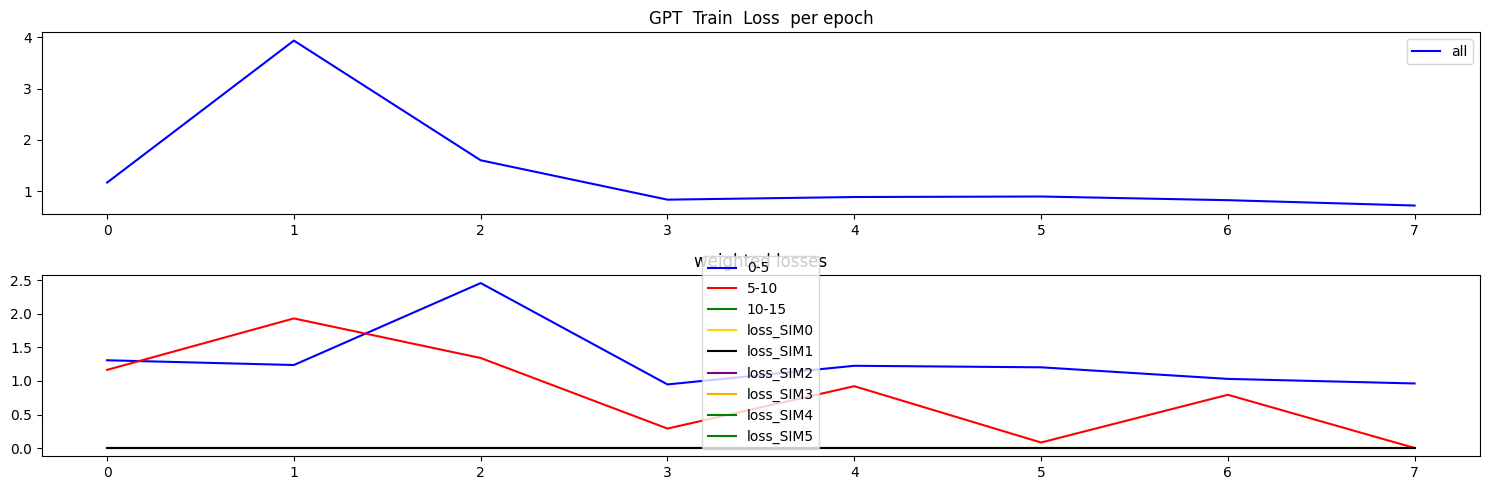

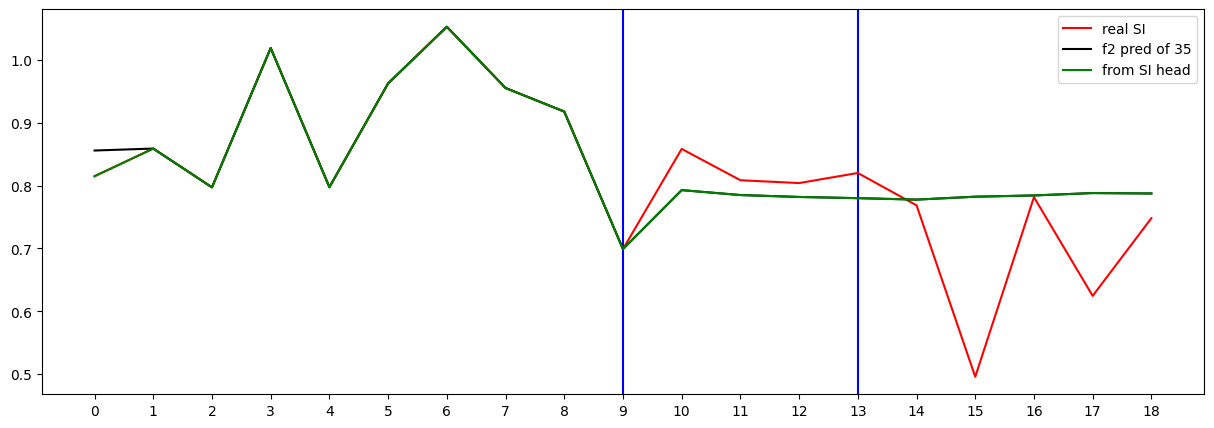

Testing R**2 - (all) - (no inputs):  0.9912576784135599
Testing R**2 - (f2) - SI full (no inputs):  -0.13640599393295472
Testing R**2 - SI head only (no inputs):  -0.13640599393295472
0 ...index R**2 (no inputs):  -0.1361789738428889
1 ...index R**2 (no inputs):  -0.11188157228489204
2 ...index R**2 (no inputs):  -0.13640599393295472
3 ...index R**2 (no inputs):  -16.392593086987254
4 ...index R**2 (no inputs):  -17.225572984854335
5 ...index R**2 (no inputs):  -1.5267785196717014
6 ...index R**2 (no inputs):  -351.4918915720414
7 ...index R**2 (no inputs):  -264.2891618016929
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2880457585377878
10 ...index R**2 (no inputs):  -0.11892279566757713
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4280252236579956
16 ...index R**2 (no inputs):  -0.1308406409350591
17 ...index R**2 (no inputs):  -348.14

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_400to500.append( res_real )
all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.120569
Loss_SI: 1.292706847190857 Loss_all: 1.2095506191253662
===


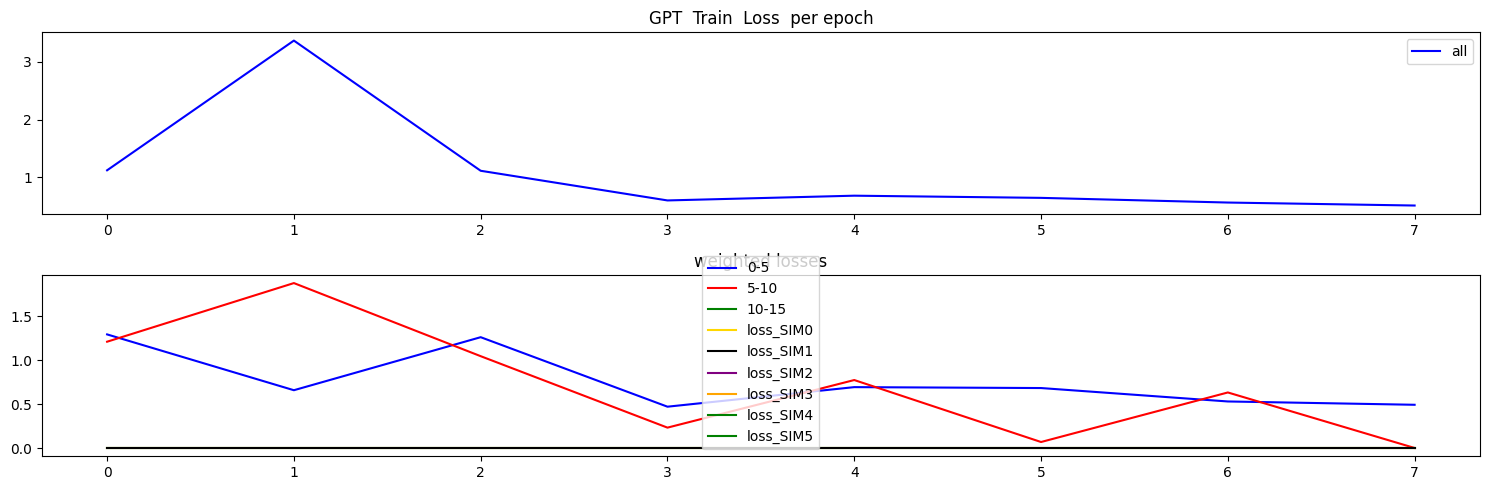

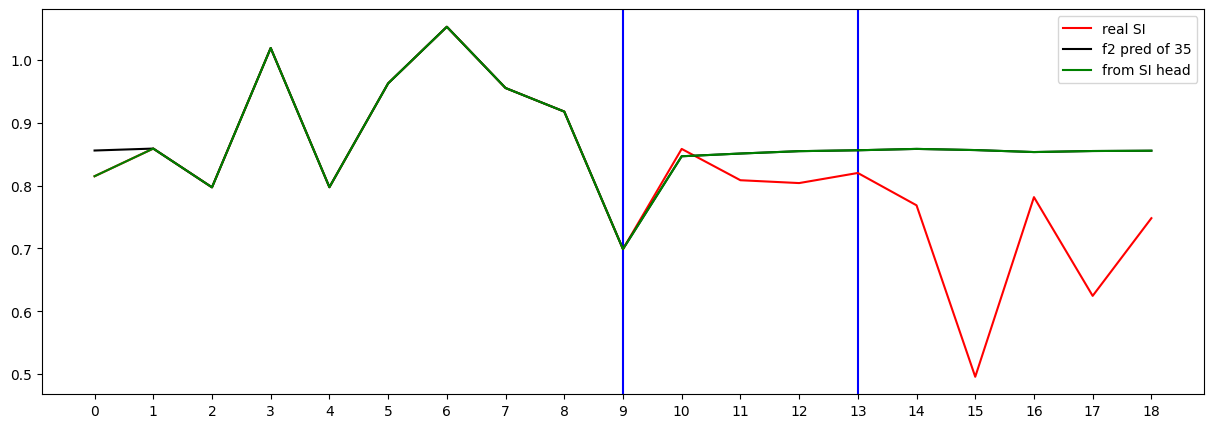

Testing R**2 - (all) - (no inputs):  0.9962135481788305
Testing R**2 - (f2) - SI full (no inputs):  -1.230756995764791
Testing R**2 - SI head only (no inputs):  -1.230756995764791
0 ...index R**2 (no inputs):  -0.07755005765946144
1 ...index R**2 (no inputs):  -1.5596211448571657
2 ...index R**2 (no inputs):  -1.230756995764791
3 ...index R**2 (no inputs):  -16.226618712605795
4 ...index R**2 (no inputs):  -24.639563046173173
5 ...index R**2 (no inputs):  -0.07228890839245783
6 ...index R**2 (no inputs):  -48.597383344777576
7 ...index R**2 (no inputs):  -2.6147663545180326
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.19510319113627594
10 ...index R**2 (no inputs):  -0.18516278775216977
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7710318651438866
16 ...index R**2 (no inputs):  -0.48850035687892546
17 ...index R**2 (no inputs):  -986.600

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to500.append( res_real )
all_pred_si_300to500.append( res_pred )


[0] Train Loss: 1.451288
Loss_SI: 1.1907886266708374 Loss_all: 1.2696830034255981
===


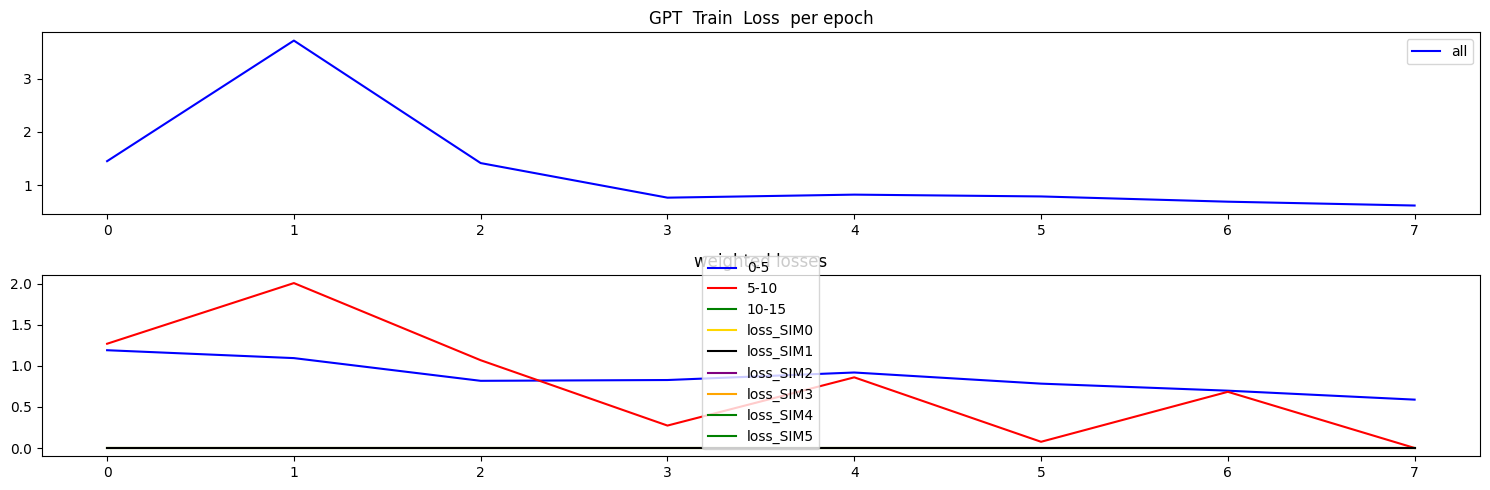

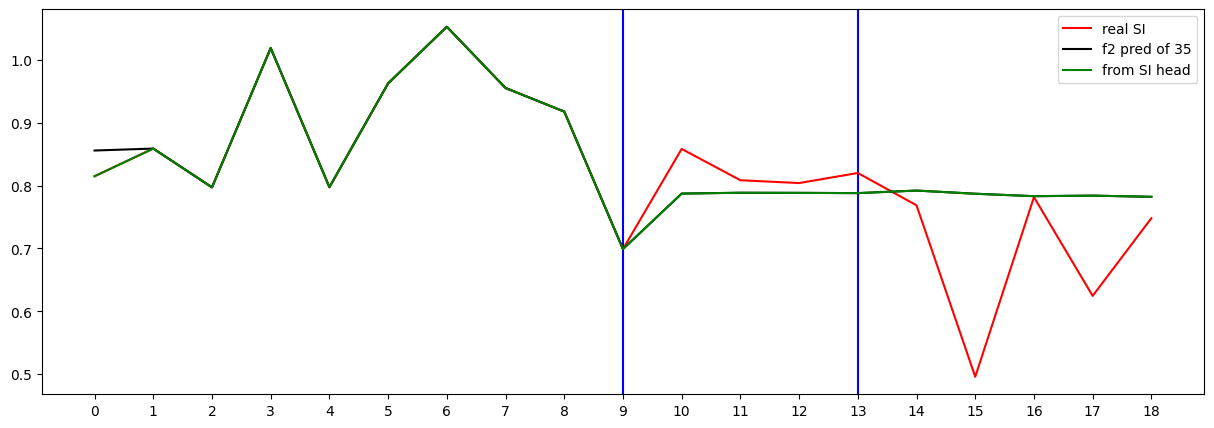

Testing R**2 - (all) - (no inputs):  0.9902452463928696
Testing R**2 - (f2) - SI full (no inputs):  -0.217822048187164
Testing R**2 - SI head only (no inputs):  -0.217822048187164
0 ...index R**2 (no inputs):  -0.057801070170300894
1 ...index R**2 (no inputs):  -0.804579653169256
2 ...index R**2 (no inputs):  -0.217822048187164
3 ...index R**2 (no inputs):  -11.938494742554674
4 ...index R**2 (no inputs):  -4721.522295902261
5 ...index R**2 (no inputs):  -1.8250468010991079
6 ...index R**2 (no inputs):  -139.90108162911045
7 ...index R**2 (no inputs):  -13190.511136502515
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2072719483422818
10 ...index R**2 (no inputs):  -0.06583951912354968
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2357508683319334
16 ...index R**2 (no inputs):  -0.562698029894861
17 ...index R**2 (no inputs):  -292.41544494

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to500.append( res_real )
all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.317710
Loss_SI: 1.3289669752120972 Loss_all: 1.235917329788208
===


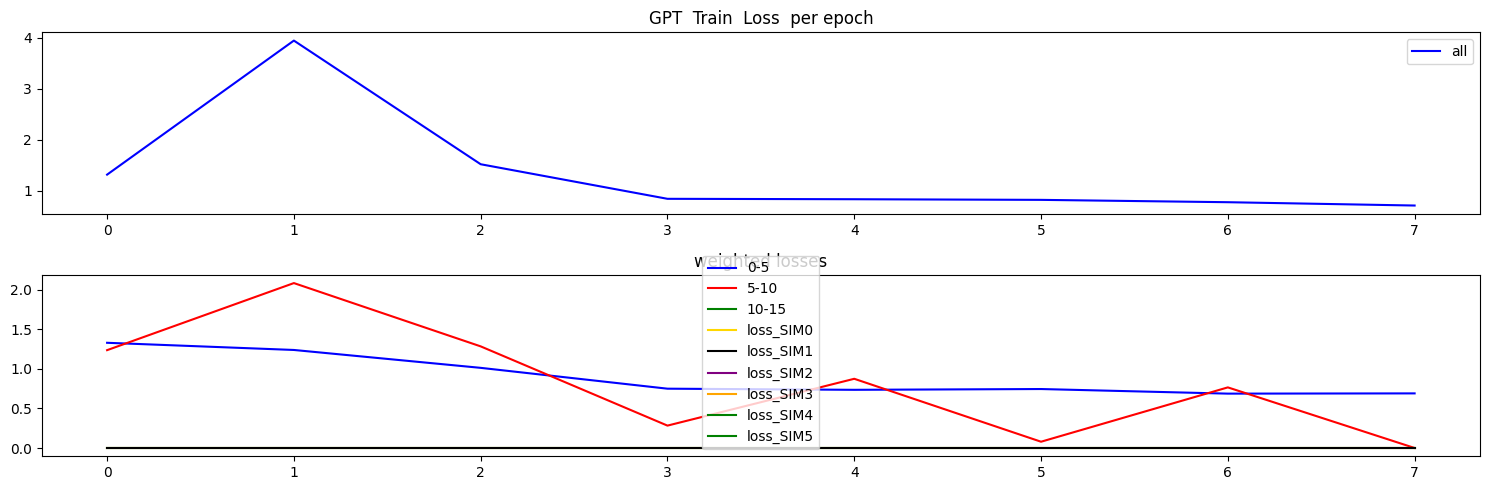

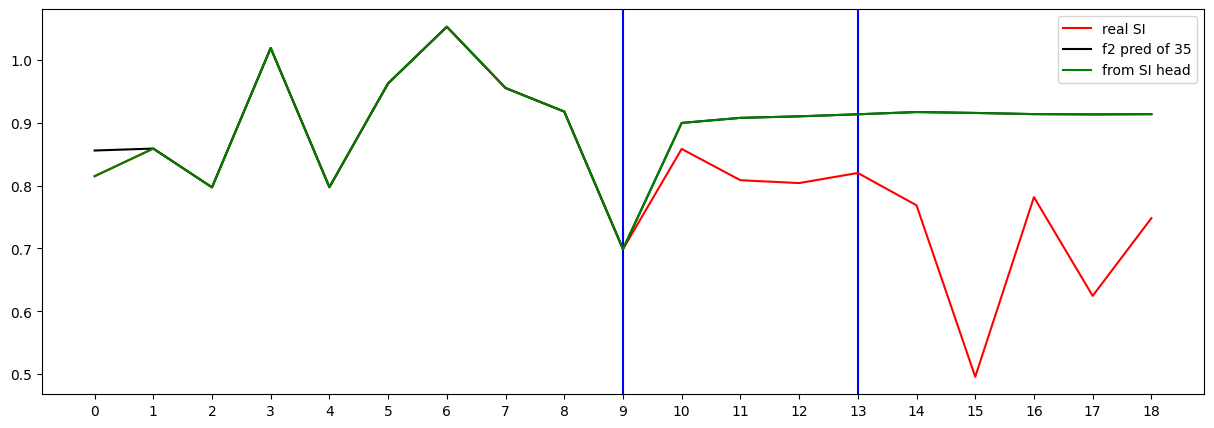

Testing R**2 - (all) - (no inputs):  0.9663122168670921
Testing R**2 - (f2) - SI full (no inputs):  -2.778108635906934
Testing R**2 - SI head only (no inputs):  -2.778108635906934
0 ...index R**2 (no inputs):  -0.0033369333060315753
1 ...index R**2 (no inputs):  -0.5306396604556305
2 ...index R**2 (no inputs):  -2.778108635906934
3 ...index R**2 (no inputs):  -52.224054994393406
4 ...index R**2 (no inputs):  -10556.784020467416
5 ...index R**2 (no inputs):  -8.474798916476765
6 ...index R**2 (no inputs):  -694.4786696158745
7 ...index R**2 (no inputs):  -99399.32006306908
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.006594760619496265
10 ...index R**2 (no inputs):  -0.6883817936443248
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1980815241670046
16 ...index R**2 (no inputs):  -0.023165746406478505
17 ...index R**2 (no inputs):  -16928.26

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to500.append( res_real )
all_pred_si_100to500.append( res_pred )


[0] Train Loss: 1.281198
Loss_SI: 1.384157419204712 Loss_all: 1.2669532299041748
===


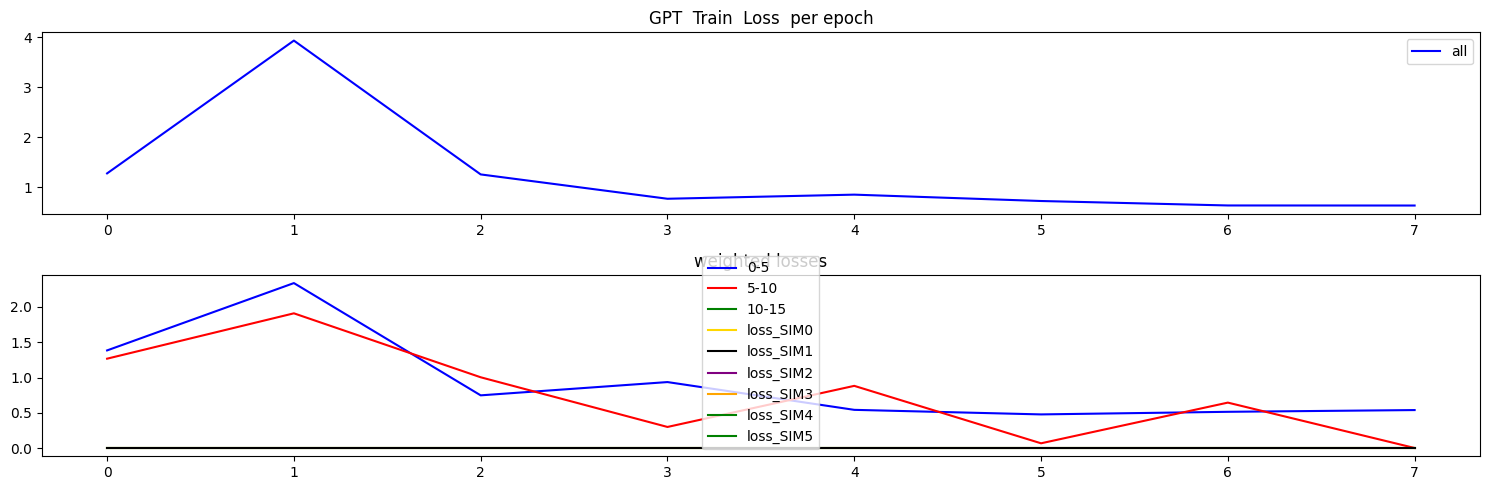

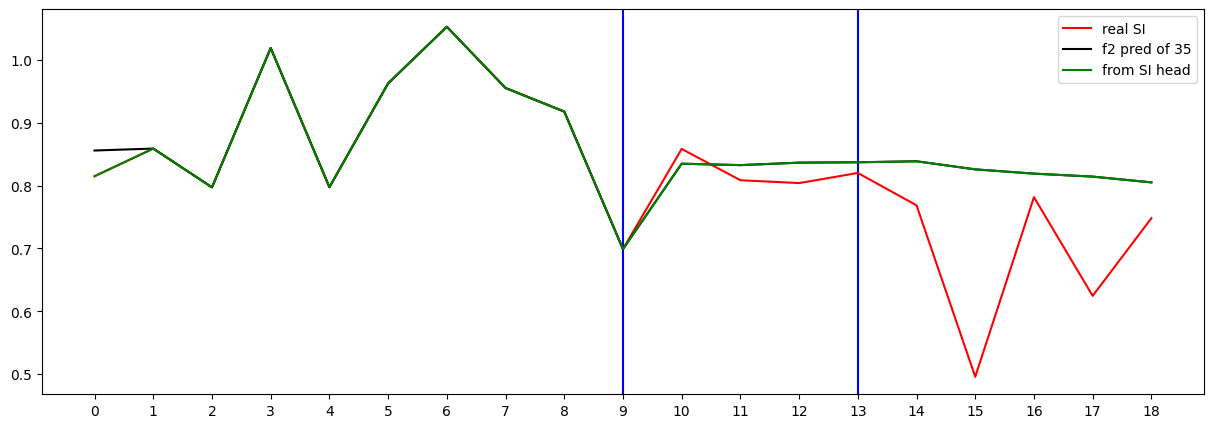

Testing R**2 - (all) - (no inputs):  0.9793795654263965
Testing R**2 - (f2) - SI full (no inputs):  -0.745705941061926
Testing R**2 - SI head only (no inputs):  -0.745705941061926
0 ...index R**2 (no inputs):  0.014361526561564197
1 ...index R**2 (no inputs):  -0.72007854309126
2 ...index R**2 (no inputs):  -0.745705941061926
3 ...index R**2 (no inputs):  -28.714032070572806
4 ...index R**2 (no inputs):  -6068.685232526592
5 ...index R**2 (no inputs):  0.38639943661710874
6 ...index R**2 (no inputs):  -267.0842400612982
7 ...index R**2 (no inputs):  -138701.80345066433
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.21848161715212666
10 ...index R**2 (no inputs):  -0.23977480744590873
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4839983528901446
16 ...index R**2 (no inputs):  -0.25770818211900304
17 ...index R**2 (no inputs):  -270619.42291

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )



## Run 2


In [31]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.192680
Loss_SI: 1.168624758720398 Loss_all: 1.2253037691116333
===


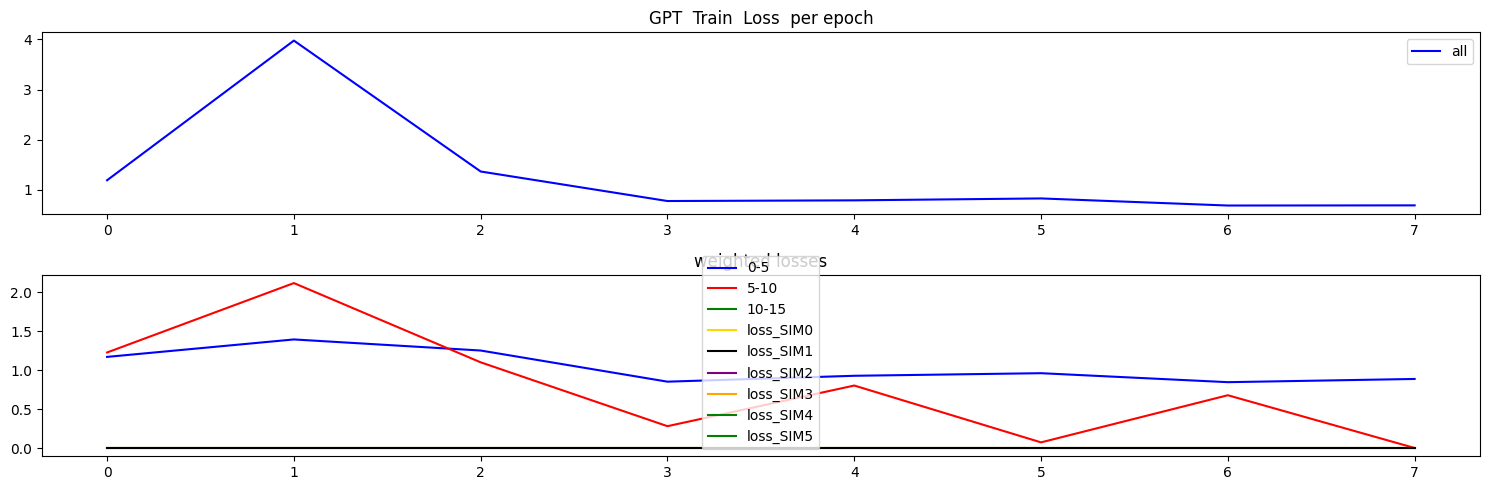

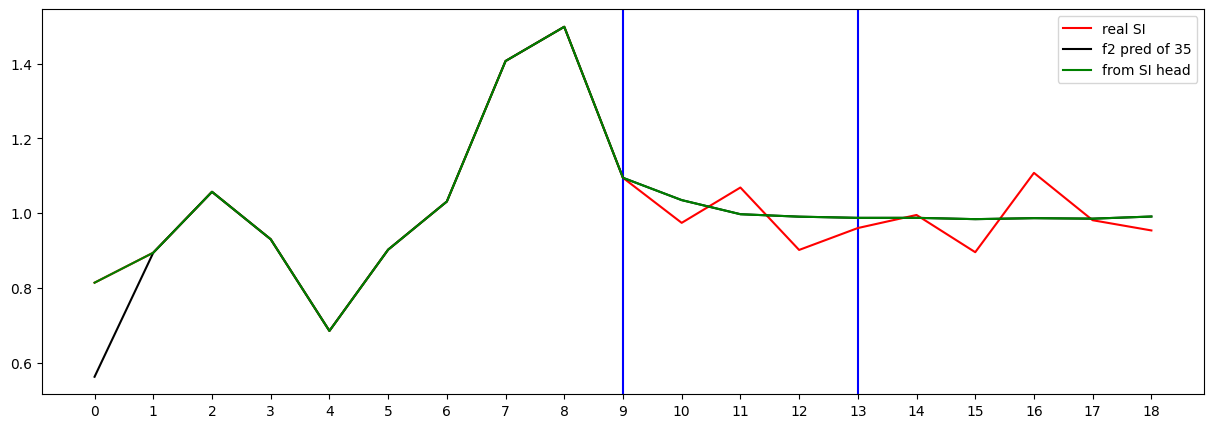

Testing R**2 - (all) - (no inputs):  0.9725283349884568
Testing R**2 - (f2) - SI full (no inputs):  -0.051699201331789846
Testing R**2 - SI head only (no inputs):  -0.051699201331789846
0 ...index R**2 (no inputs):  -0.10495703763049069
1 ...index R**2 (no inputs):  0.11165773448086513
2 ...index R**2 (no inputs):  -0.051699201331789846
3 ...index R**2 (no inputs):  -22468.78219407966
4 ...index R**2 (no inputs):  -20996.49891013072
5 ...index R**2 (no inputs):  -63.960994967292905
6 ...index R**2 (no inputs):  -1528.9785491744958
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3418162679611487
10 ...index R**2 (no inputs):  -0.17109759307147798
11 ...index R**2 (no inputs):  -365.22378121746794
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.4004318899992962
16 ...index R**2 (no inputs):  -0.487405495552643
17 ...index R**2 (no inputs):  -39.4

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_400to500.append( res_real )
all_pred_si_400to500.append( res_pred )



[0] Train Loss: 1.174188
Loss_SI: 1.7056550979614258 Loss_all: 1.1475626230239868
===


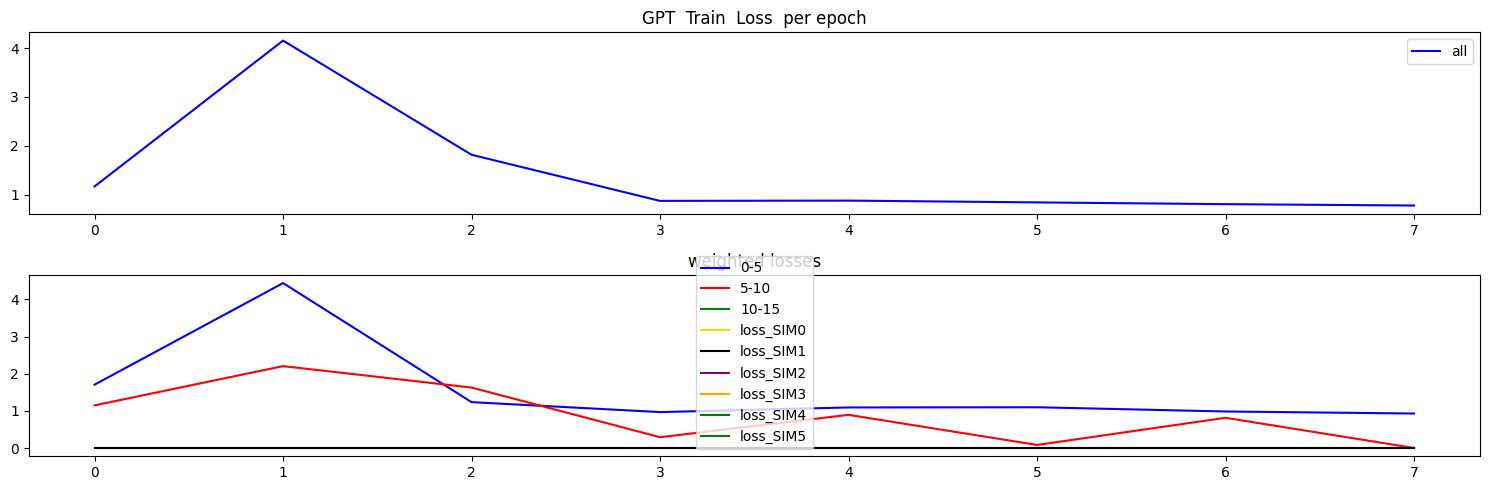

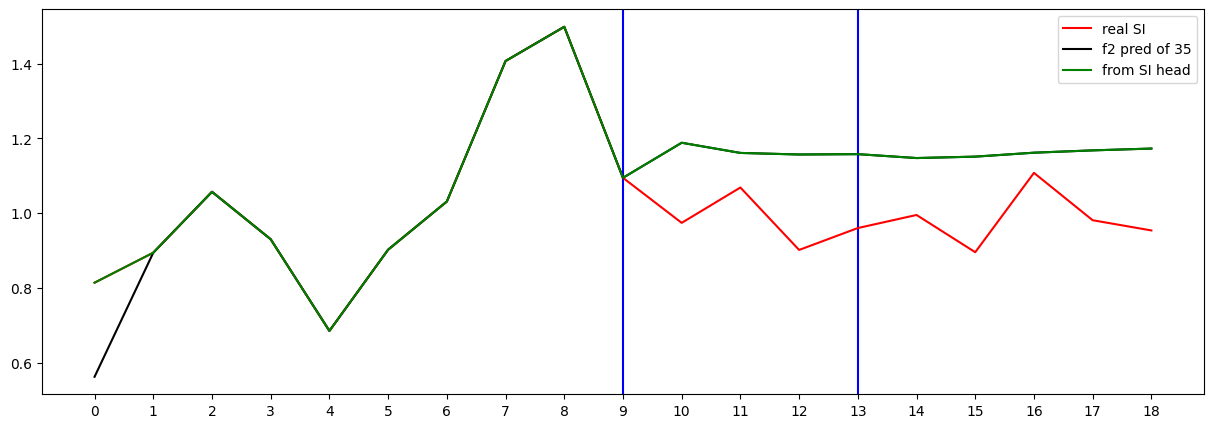

Testing R**2 - (all) - (no inputs):  0.9945388764767267
Testing R**2 - (f2) - SI full (no inputs):  -5.545956919120914
Testing R**2 - SI head only (no inputs):  -5.545956919120914
0 ...index R**2 (no inputs):  -0.10573448236431493
1 ...index R**2 (no inputs):  -0.17130851599348107
2 ...index R**2 (no inputs):  -5.545956919120914
3 ...index R**2 (no inputs):  -23843.09932330935
4 ...index R**2 (no inputs):  -3626.8088423683816
5 ...index R**2 (no inputs):  -10.752795844833232
6 ...index R**2 (no inputs):  -120.63360636702949
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.32105276210913614
10 ...index R**2 (no inputs):  -0.03794868717215594
11 ...index R**2 (no inputs):  -122.28967147224421
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.10240565686739567
16 ...index R**2 (no inputs):  -0.20762844248833257
17 ...index R**2 (no inputs):  -651.250

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to500.append( res_real )
all_pred_si_300to500.append( res_pred )


[0] Train Loss: 1.226590
Loss_SI: 1.3723877668380737 Loss_all: 1.1728172302246094
===


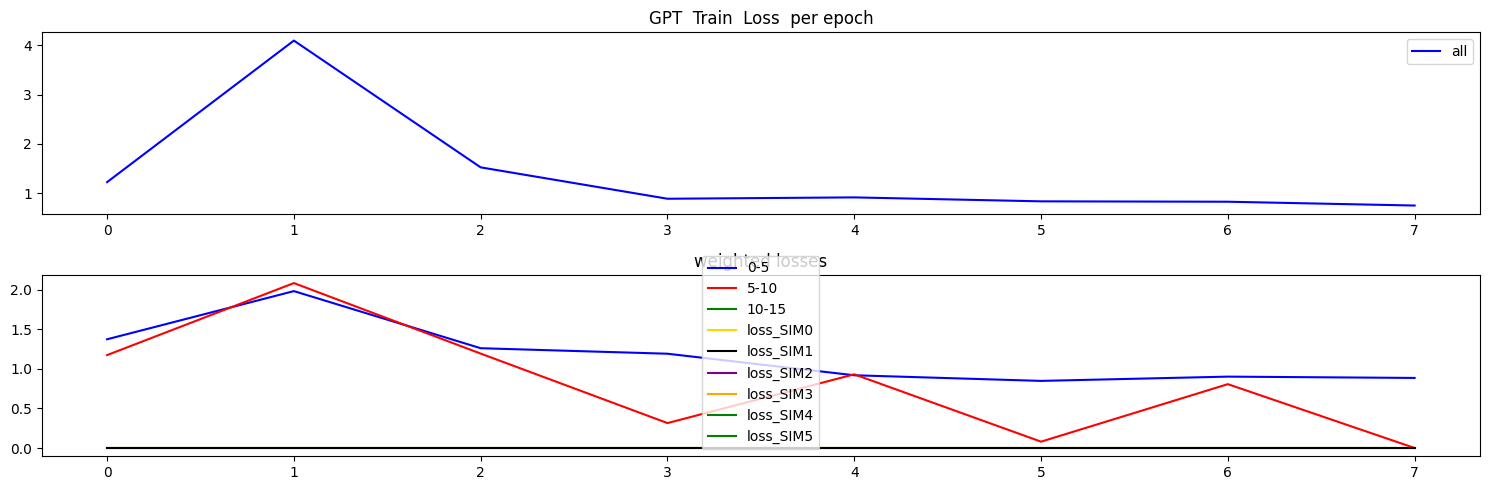

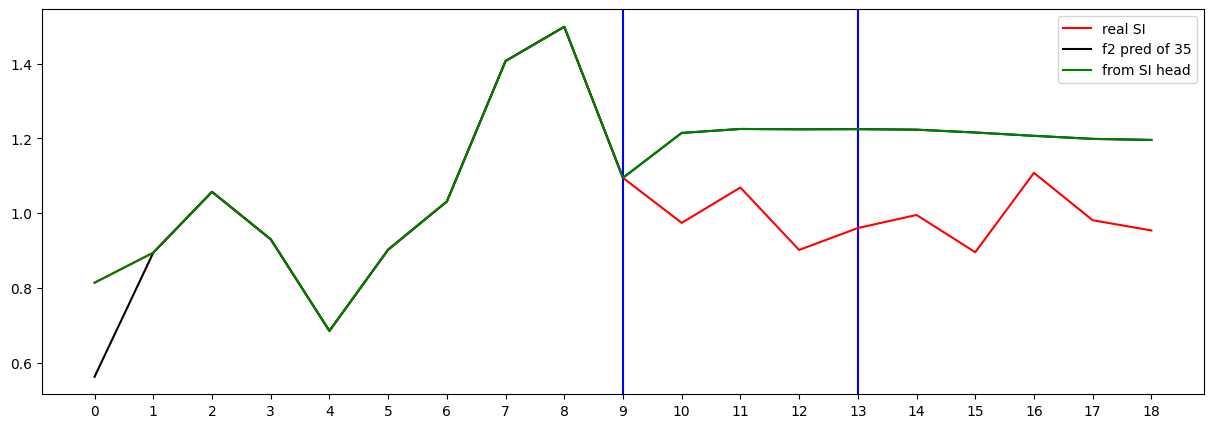

Testing R**2 - (all) - (no inputs):  0.9918347134154818
Testing R**2 - (f2) - SI full (no inputs):  -8.744895060319337
Testing R**2 - SI head only (no inputs):  -8.744895060319337
0 ...index R**2 (no inputs):  -3.845059884704243
1 ...index R**2 (no inputs):  0.02001317195660124
2 ...index R**2 (no inputs):  -8.744895060319337
3 ...index R**2 (no inputs):  -28631.80771423382
4 ...index R**2 (no inputs):  -2329.250186339963
5 ...index R**2 (no inputs):  -16.520942061950667
6 ...index R**2 (no inputs):  -791.9333594555989
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5605516032431621
10 ...index R**2 (no inputs):  -0.008478594006637863
11 ...index R**2 (no inputs):  -670.5734186890919
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1928694253984071
16 ...index R**2 (no inputs):  -0.02111763540934719
17 ...index R**2 (no inputs):  -1640.624894760

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to500.append( res_real )
all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.228285
Loss_SI: 1.5613301992416382 Loss_all: 1.273545742034912
===


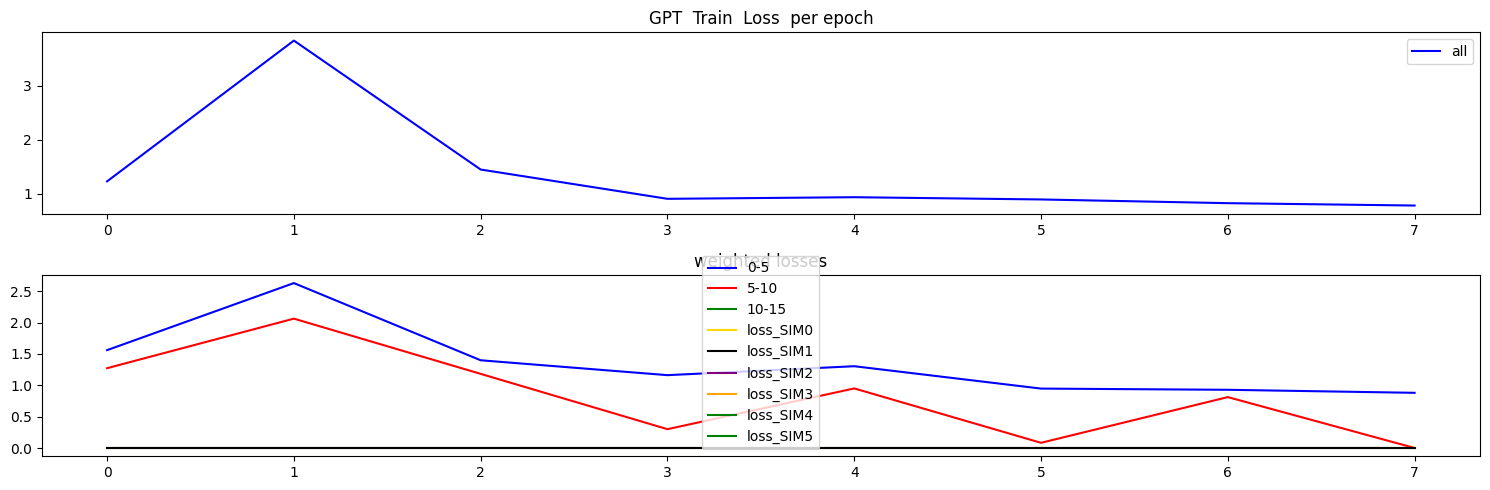

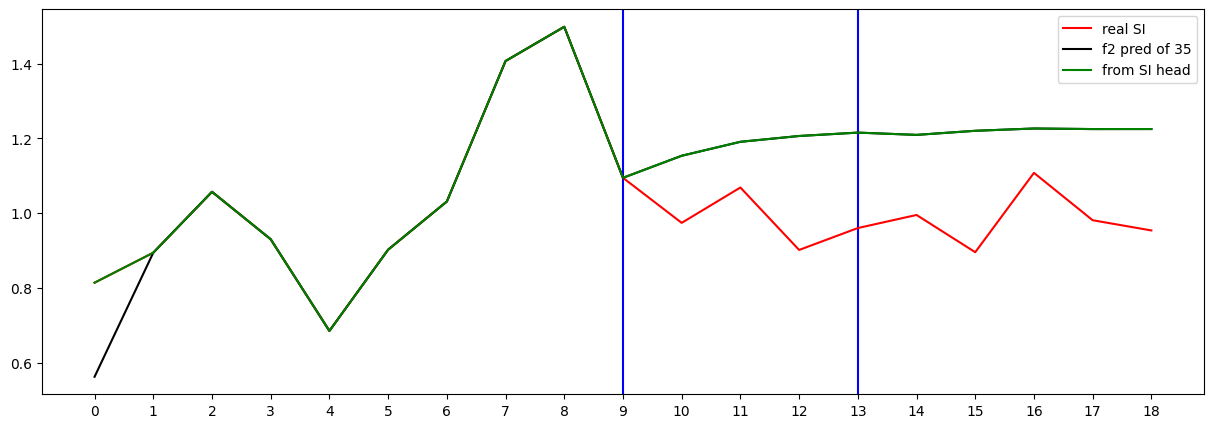

Testing R**2 - (all) - (no inputs):  0.931120113168479
Testing R**2 - (f2) - SI full (no inputs):  -8.581259997054113
Testing R**2 - SI head only (no inputs):  -8.581259997054113
0 ...index R**2 (no inputs):  -0.5441475725343476
1 ...index R**2 (no inputs):  -0.24204803087044002
2 ...index R**2 (no inputs):  -8.581259997054113
3 ...index R**2 (no inputs):  -29003.02535478044
4 ...index R**2 (no inputs):  -23351.01870305868
5 ...index R**2 (no inputs):  -159.44656745831705
6 ...index R**2 (no inputs):  -251.0025026781943
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08132708914851094
10 ...index R**2 (no inputs):  -0.014381177652318833
11 ...index R**2 (no inputs):  -55.181313145025584
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.074996693422213
16 ...index R**2 (no inputs):  0.025580065778054273
17 ...index R**2 (no inputs):  -6399.1430271

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to500.append( res_real )
all_pred_si_100to500.append( res_pred )


[0] Train Loss: 1.302303
Loss_SI: 1.286248803138733 Loss_all: 1.2664430141448975
===


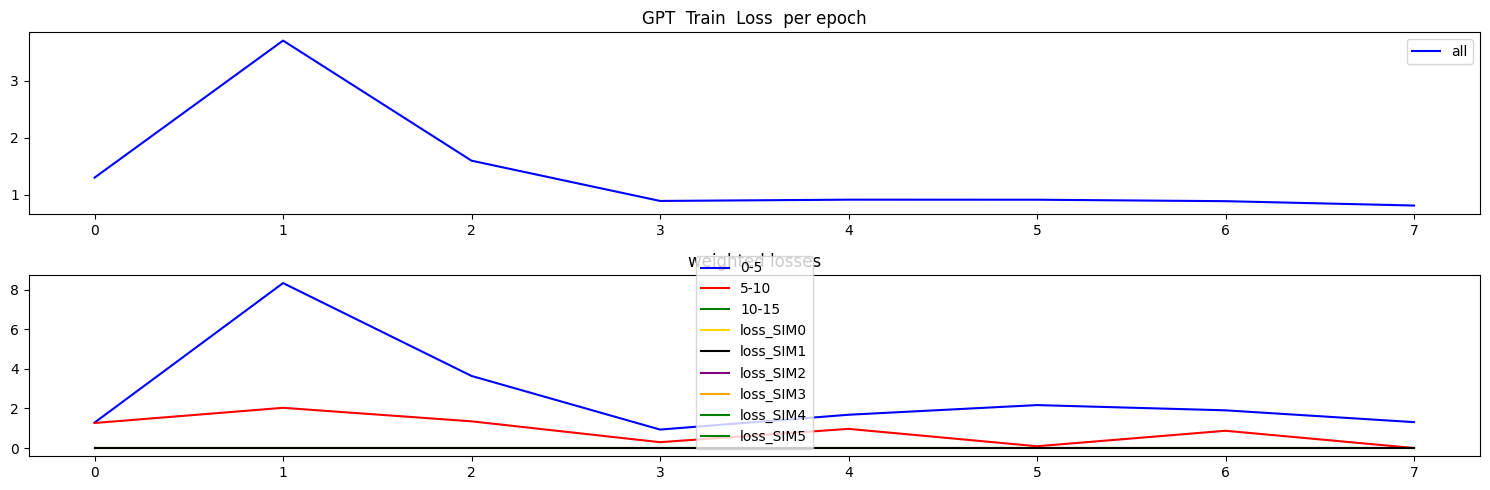

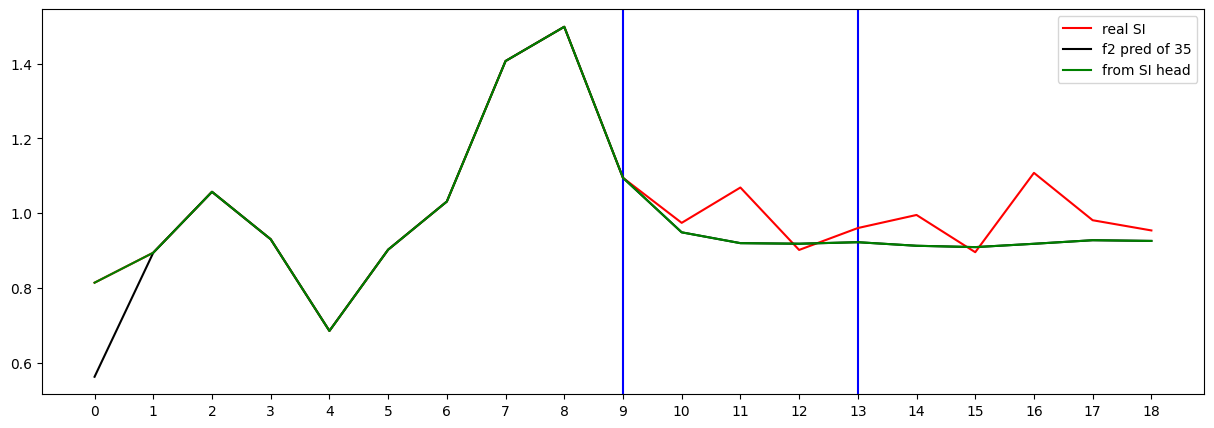

Testing R**2 - (all) - (no inputs):  0.7793299746667126
Testing R**2 - (f2) - SI full (no inputs):  -0.22739298401902985
Testing R**2 - SI head only (no inputs):  -0.22739298401902985
0 ...index R**2 (no inputs):  -0.04966483176106129
1 ...index R**2 (no inputs):  -0.041899606211002416
2 ...index R**2 (no inputs):  -0.22739298401902985
3 ...index R**2 (no inputs):  -31154.875295704125
4 ...index R**2 (no inputs):  -89902.30032186076
5 ...index R**2 (no inputs):  -519.2402605410764
6 ...index R**2 (no inputs):  -111.06146447068153
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.00163225581981008
10 ...index R**2 (no inputs):  -0.011830438844504299
11 ...index R**2 (no inputs):  -280.03252199215257
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.23314881305212842
16 ...index R**2 (no inputs):  -0.21917555717106452
17 ...index R**2 (no inputs):  -

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )



## Run 3


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.122360
Loss_SI: 1.4232673645019531 Loss_all: 1.1598784923553467
===


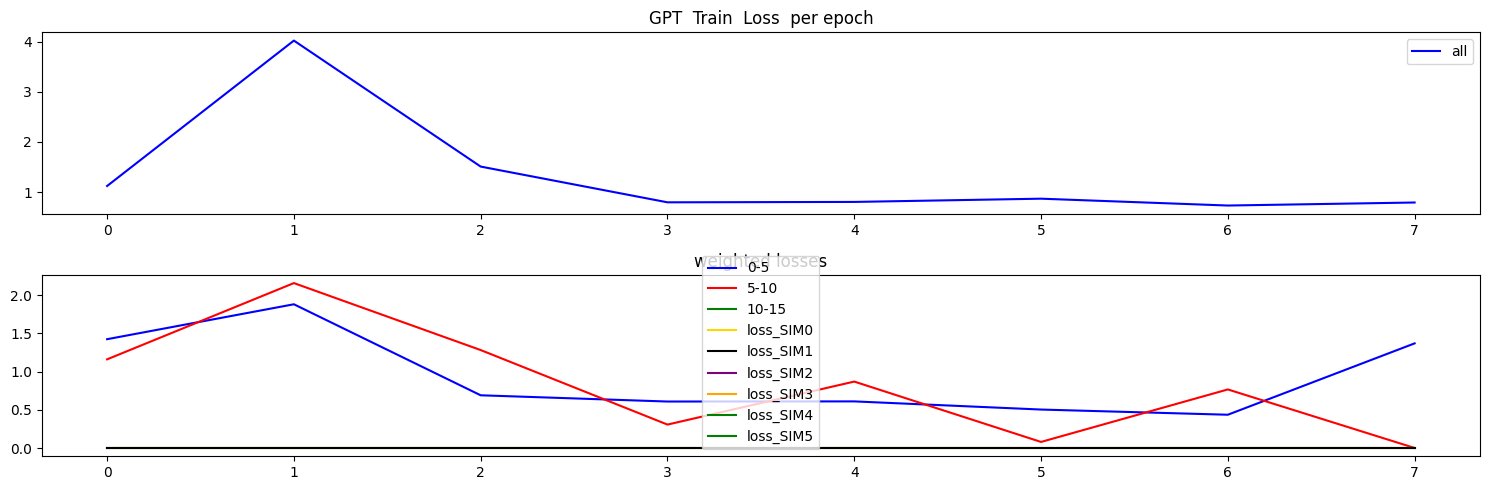

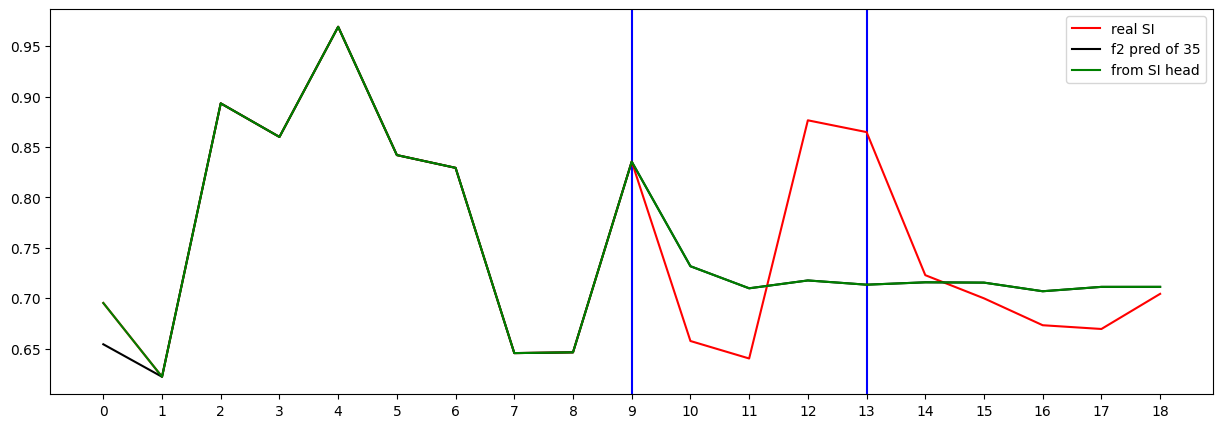

Testing R**2 - (all) - (no inputs):  0.997270237022734
Testing R**2 - (f2) - SI full (no inputs):  -0.07499434792086168
Testing R**2 - SI head only (no inputs):  -0.07499434792086168
0 ...index R**2 (no inputs):  0.0010900783196865493
1 ...index R**2 (no inputs):  -4.903605173329719
2 ...index R**2 (no inputs):  -0.07499434792086168
3 ...index R**2 (no inputs):  -0.14848385677990716
4 ...index R**2 (no inputs):  -14.871452704582937
5 ...index R**2 (no inputs):  -5.288367363626672
6 ...index R**2 (no inputs):  -6.439704862066357
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.057649769144291874
10 ...index R**2 (no inputs):  -0.2514587166234272
11 ...index R**2 (no inputs):  -178.171704412429
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.2644151766016312
16 ...index R**2 (no inputs):  -0.04625827220198464
17 ...index R**2 (no inputs):  -49.307

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_400to500.append( res_real )
all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.135330
Loss_SI: 1.1846727132797241 Loss_all: 1.1736880540847778
===


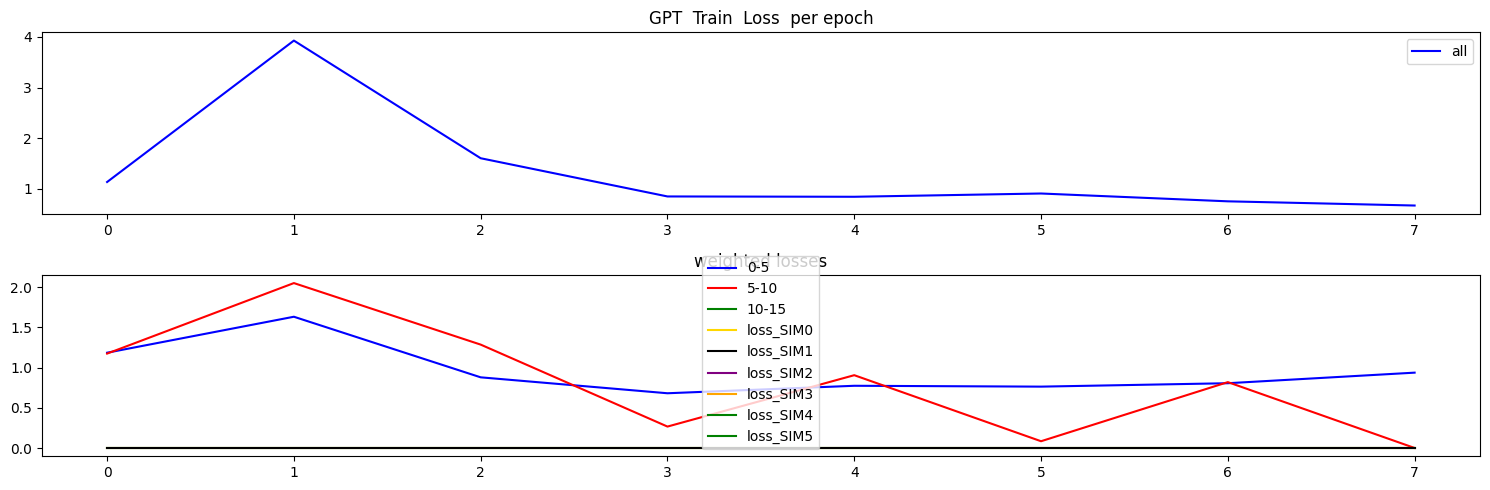

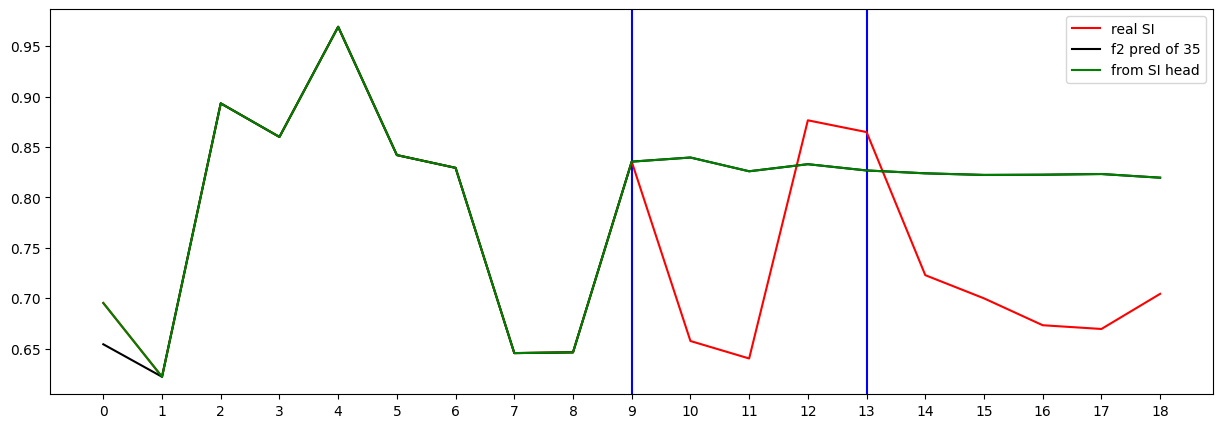

Testing R**2 - (all) - (no inputs):  0.9994701247899277
Testing R**2 - (f2) - SI full (no inputs):  -1.5236270062983763
Testing R**2 - SI head only (no inputs):  -1.5236270062983763
0 ...index R**2 (no inputs):  -0.6313961055001192
1 ...index R**2 (no inputs):  -1.7000983853944454
2 ...index R**2 (no inputs):  -1.5236270062983763
3 ...index R**2 (no inputs):  -27.84212056810184
4 ...index R**2 (no inputs):  -7.913750970549142
5 ...index R**2 (no inputs):  -0.16624105002613265
6 ...index R**2 (no inputs):  -28.314906459252807
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.28613457621387983
10 ...index R**2 (no inputs):  -0.167429886409995
11 ...index R**2 (no inputs):  -185.3722348259499
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2227153426387265
16 ...index R**2 (no inputs):  0.005446776322014624
17 ...index R**2 (no inputs):  -42.1518590

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to500.append( res_real )
all_pred_si_300to500.append( res_pred )


[0] Train Loss: 1.168174
Loss_SI: 1.384508490562439 Loss_all: 1.156346082687378
===


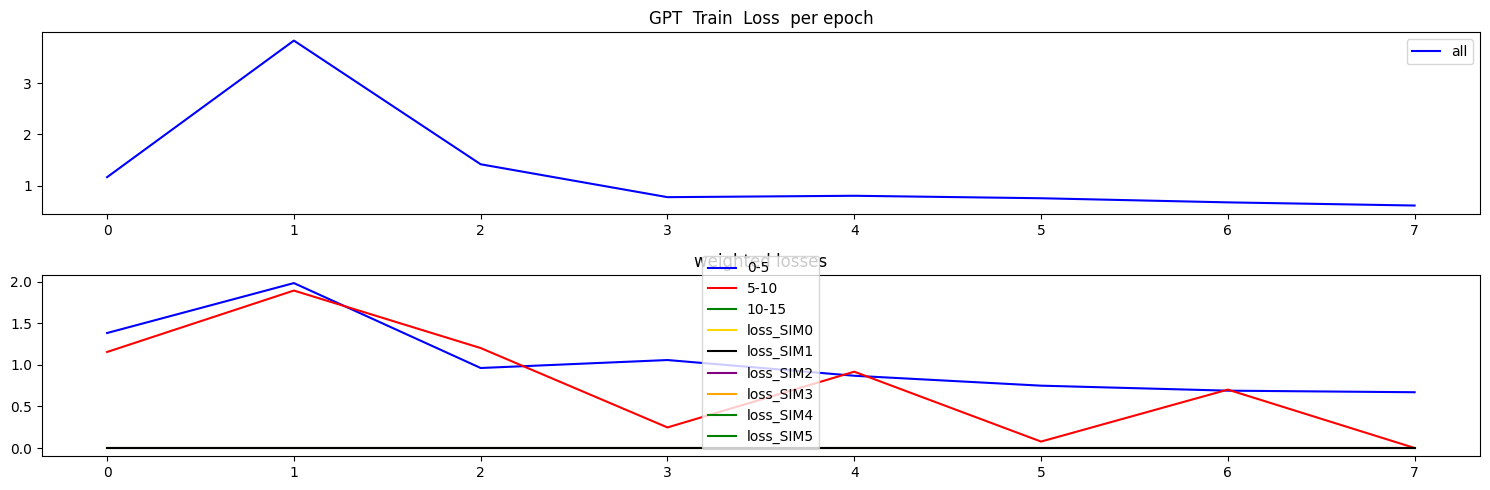

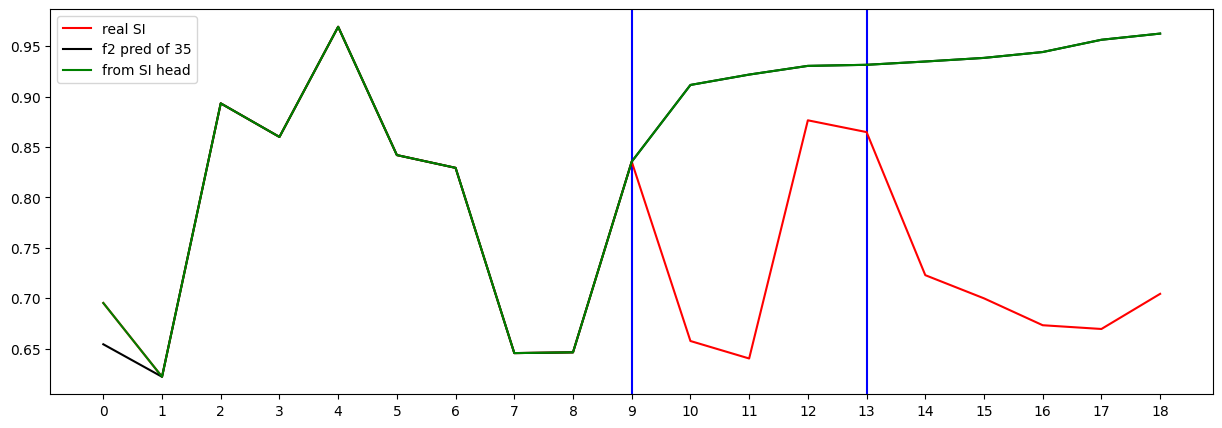

Testing R**2 - (all) - (no inputs):  0.9975263758738847
Testing R**2 - (f2) - SI full (no inputs):  -7.013368425165655
Testing R**2 - SI head only (no inputs):  -7.013368425165655
0 ...index R**2 (no inputs):  -0.06315706505837837
1 ...index R**2 (no inputs):  -0.7726063421714613
2 ...index R**2 (no inputs):  -7.013368425165655
3 ...index R**2 (no inputs):  -686.23301637761
4 ...index R**2 (no inputs):  -553.6219313664798
5 ...index R**2 (no inputs):  -4.454950867774797
6 ...index R**2 (no inputs):  -1793.4127872486993
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.17149574461657435
10 ...index R**2 (no inputs):  -0.045150243702639425
11 ...index R**2 (no inputs):  -61.58589922030785
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.573483257979431
16 ...index R**2 (no inputs):  -0.4111197807488993
17 ...index R**2 (no inputs):  -335.82689791655

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to500.append( res_real )
all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.280196
Loss_SI: 1.3736141920089722 Loss_all: 1.2670985460281372
===


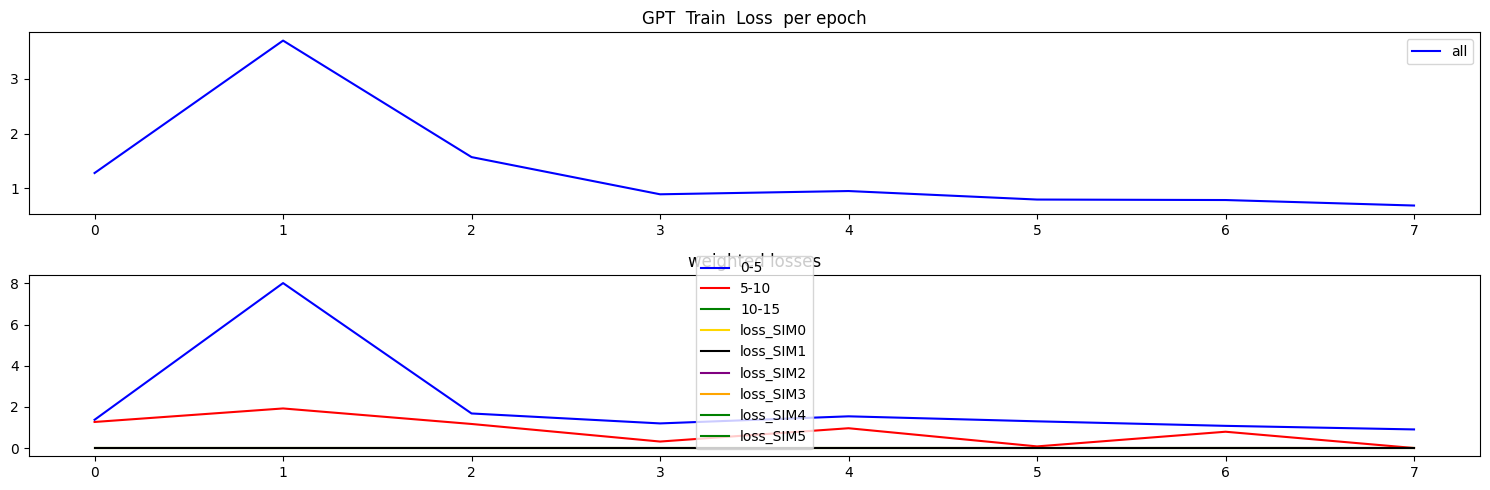

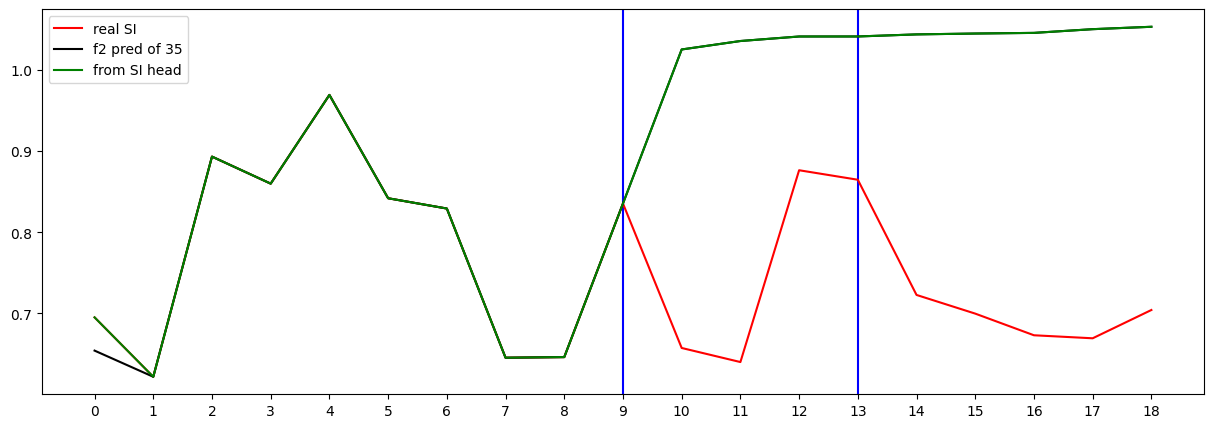

Testing R**2 - (all) - (no inputs):  0.9964710730109826
Testing R**2 - (f2) - SI full (no inputs):  -15.601349077605231
Testing R**2 - SI head only (no inputs):  -15.601349077605231
0 ...index R**2 (no inputs):  -0.018786101359760998
1 ...index R**2 (no inputs):  -0.6003852658804241
2 ...index R**2 (no inputs):  -15.601349077605231
3 ...index R**2 (no inputs):  -608.6139767618481
4 ...index R**2 (no inputs):  -286.19493559856755
5 ...index R**2 (no inputs):  -6.33763518073141
6 ...index R**2 (no inputs):  -942.9058406899719
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.31028727867652783
10 ...index R**2 (no inputs):  -0.05024690704822188
11 ...index R**2 (no inputs):  -14.296593223343825
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7459330955958512
16 ...index R**2 (no inputs):  -0.5325798874285463
17 ...index R**2 (no inputs):  -1034.1264

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to500.append( res_real )
all_pred_si_100to500.append( res_pred )


[0] Train Loss: 1.249237
Loss_SI: 1.0127366781234741 Loss_all: 1.2267343997955322
===


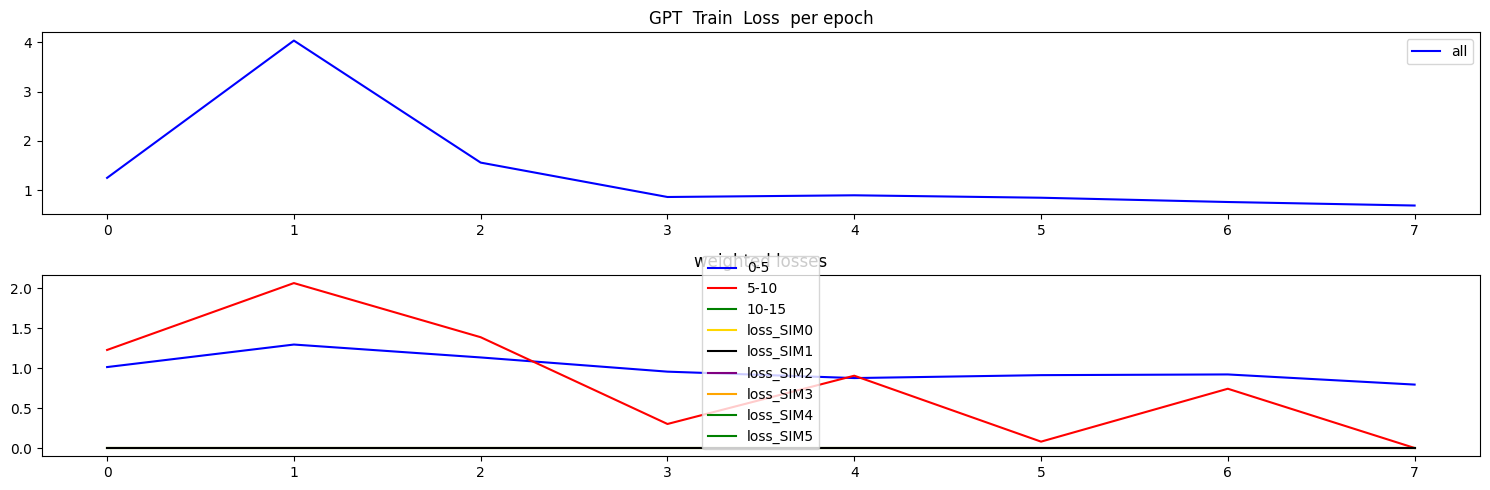

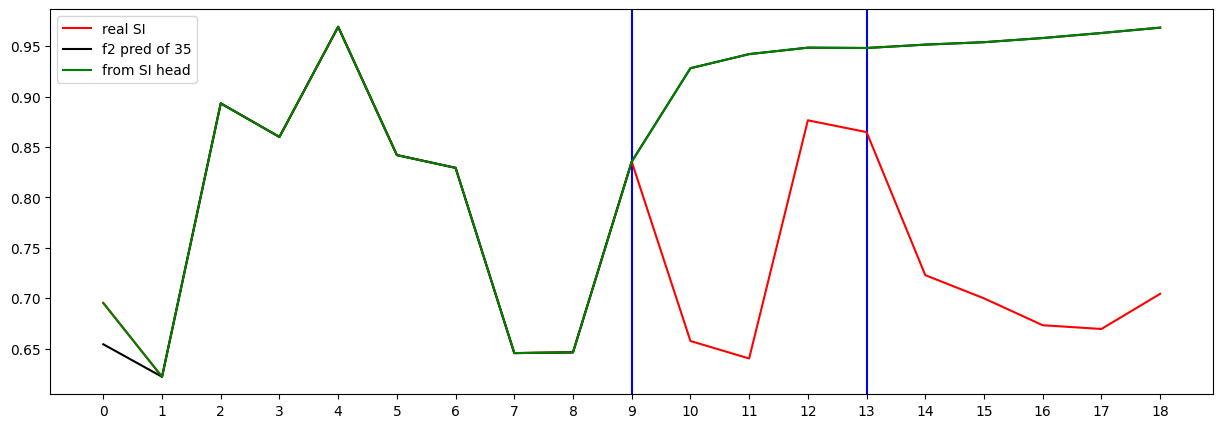

Testing R**2 - (all) - (no inputs):  0.997881367490431
Testing R**2 - (f2) - SI full (no inputs):  -7.9300511413151415
Testing R**2 - SI head only (no inputs):  -7.9300511413151415
0 ...index R**2 (no inputs):  -0.28302436833026845
1 ...index R**2 (no inputs):  -2.283697806955465
2 ...index R**2 (no inputs):  -7.9300511413151415
3 ...index R**2 (no inputs):  -570.9918624551149
4 ...index R**2 (no inputs):  -586.346515836802
5 ...index R**2 (no inputs):  -3.0646844220010205
6 ...index R**2 (no inputs):  -659.466238714495
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3093776653602698
10 ...index R**2 (no inputs):  -0.10879161436103058
11 ...index R**2 (no inputs):  -88.63292819154218
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.6921494131458257
16 ...index R**2 (no inputs):  -1.6871434536579057
17 ...index R**2 (no inputs):  -1016.2340346066

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )



## Run 4


In [43]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.952503
Loss_SI: 1.2557729482650757 Loss_all: 1.0797737836837769
===


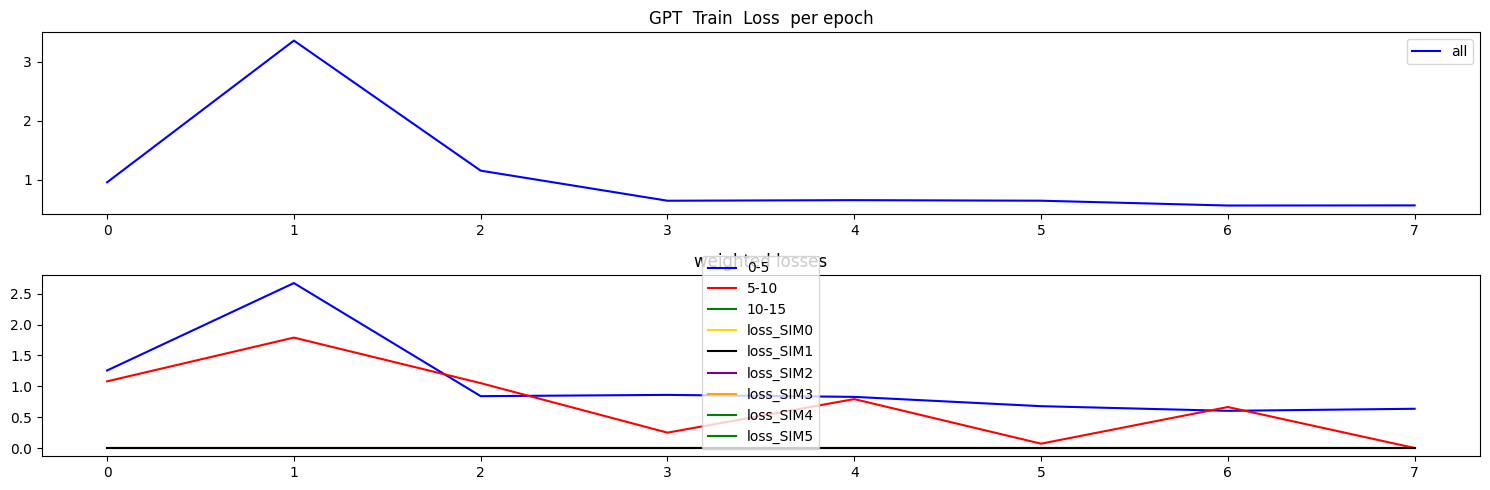

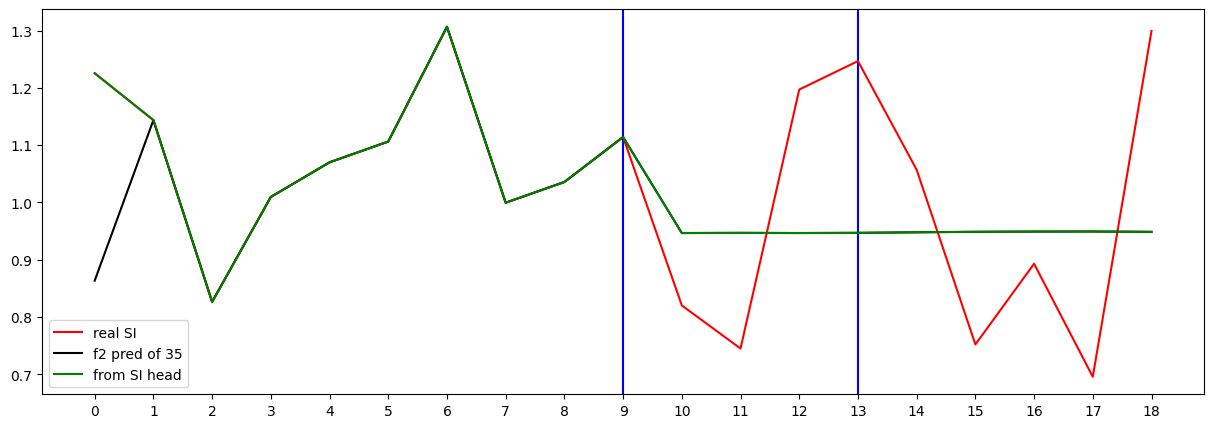

Testing R**2 - (all) - (no inputs):  0.9453587211886685
Testing R**2 - (f2) - SI full (no inputs):  -0.07984552491165475
Testing R**2 - SI head only (no inputs):  -0.07984552491165475
0 ...index R**2 (no inputs):  -0.007899858634611956
1 ...index R**2 (no inputs):  -0.00475727506807444
2 ...index R**2 (no inputs):  -0.07984552491165475
3 ...index R**2 (no inputs):  -12.777816283471445
4 ...index R**2 (no inputs):  0.005099393118244366
5 ...index R**2 (no inputs):  -0.057423068651738296
6 ...index R**2 (no inputs):  -0.004179030485998103
7 ...index R**2 (no inputs):  -20.886777312378065
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2821495590065939
10 ...index R**2 (no inputs):  -0.0008784035130626755
11 ...index R**2 (no inputs):  -160.23301111245672
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.3899390671561163
16 ...index R**2 (no inputs):  -0.0327465197721204
17 ...index

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk400to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_400to500.append( res_real )
all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.289045
Loss_SI: 1.0984625816345215 Loss_all: 1.2162386178970337
===


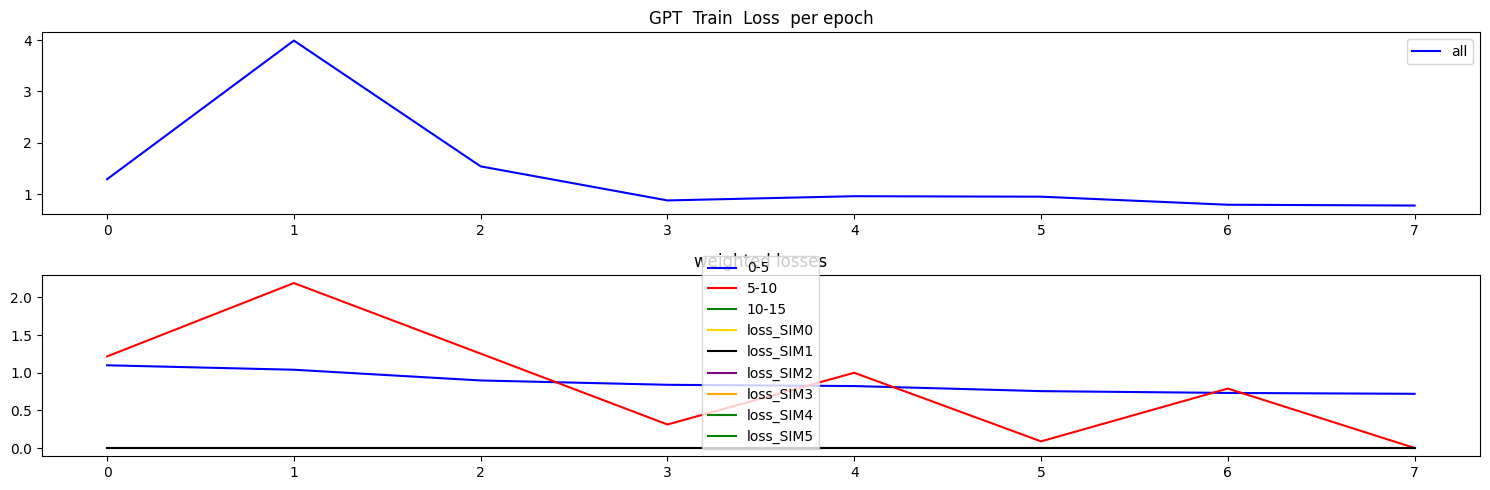

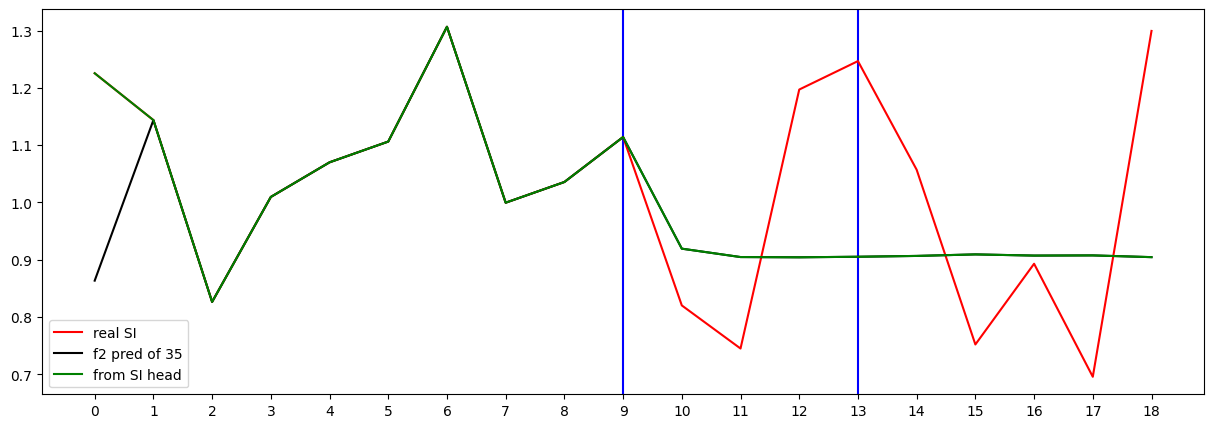

Testing R**2 - (all) - (no inputs):  0.9346857731730693
Testing R**2 - (f2) - SI full (no inputs):  -0.2308121008432349
Testing R**2 - SI head only (no inputs):  -0.2308121008432349
0 ...index R**2 (no inputs):  -0.06845062930838686
1 ...index R**2 (no inputs):  -0.016901728749800338
2 ...index R**2 (no inputs):  -0.2308121008432349
3 ...index R**2 (no inputs):  -16.260999763967433
4 ...index R**2 (no inputs):  -0.022777496198692626
5 ...index R**2 (no inputs):  -0.2641454837086079
6 ...index R**2 (no inputs):  -1.3726974582459572
7 ...index R**2 (no inputs):  -19.26919848572148
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5386646747102406
10 ...index R**2 (no inputs):  -0.008464407363579118
11 ...index R**2 (no inputs):  -309.1941366474529
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.0850852787918432
16 ...index R**2 (no inputs):  -0.17772079166537158
17 ...index R**2 (n

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to500.append( res_real )
all_pred_si_300to500.append( res_pred )


[0] Train Loss: 1.146821
Loss_SI: 1.0918290615081787 Loss_all: 1.2075656652450562
===


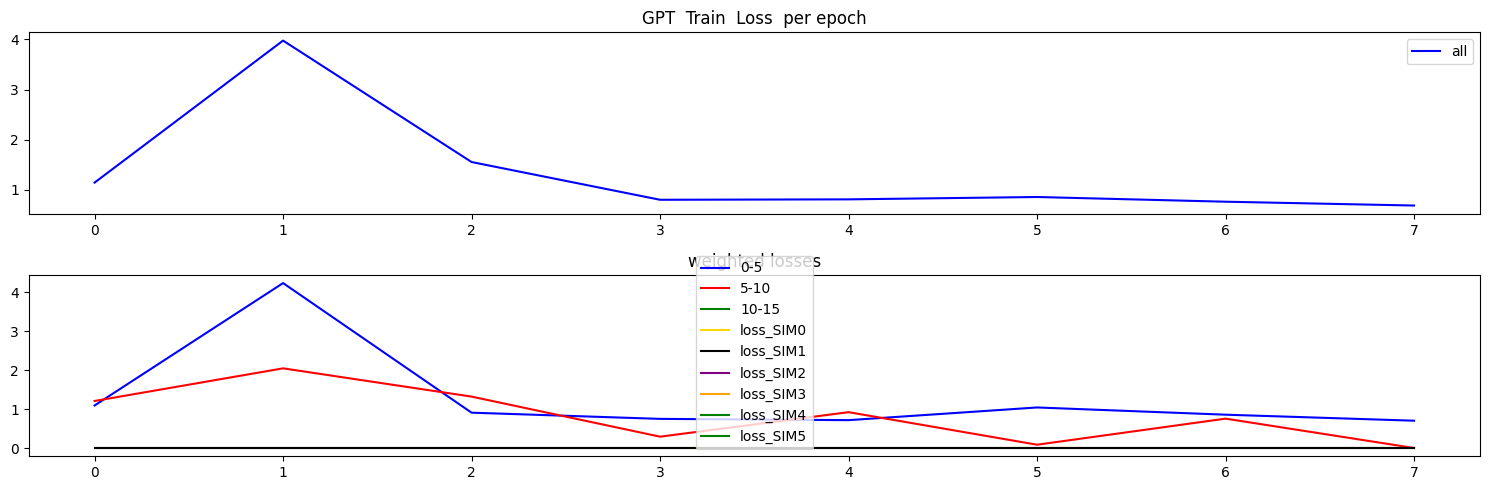

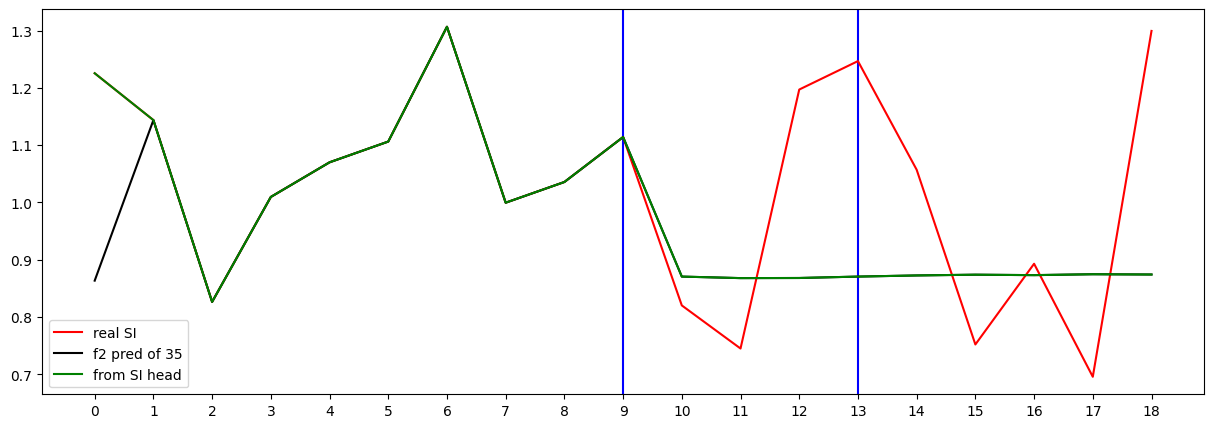

Testing R**2 - (all) - (no inputs):  0.9201057749066229
Testing R**2 - (f2) - SI full (no inputs):  -0.3803629421898129
Testing R**2 - SI head only (no inputs):  -0.3803629421898129
0 ...index R**2 (no inputs):  -0.006421400970429314
1 ...index R**2 (no inputs):  -0.02969751065512627
2 ...index R**2 (no inputs):  -0.3803629421898129
3 ...index R**2 (no inputs):  -14.088799147629954
4 ...index R**2 (no inputs):  -0.03782613222426612
5 ...index R**2 (no inputs):  -0.5427468670966544
6 ...index R**2 (no inputs):  -58.37356232596615
7 ...index R**2 (no inputs):  -5.926988549372326
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3549252424181675
10 ...index R**2 (no inputs):  -0.24763402237547094
11 ...index R**2 (no inputs):  -701.7646157456194
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.7641545054135346
16 ...index R**2 (no inputs):  -0.35758242995034384
17 ...index R**2 (no i

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to500.append( res_real )
all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.212032
Loss_SI: 1.2771916389465332 Loss_all: 1.2421164512634277
===


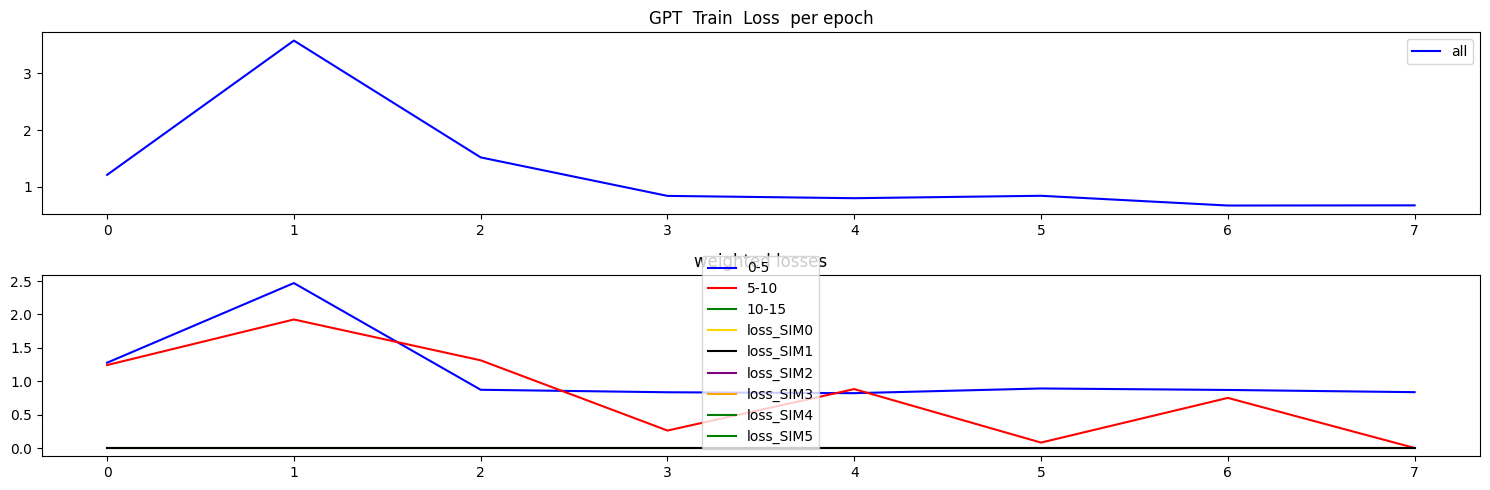

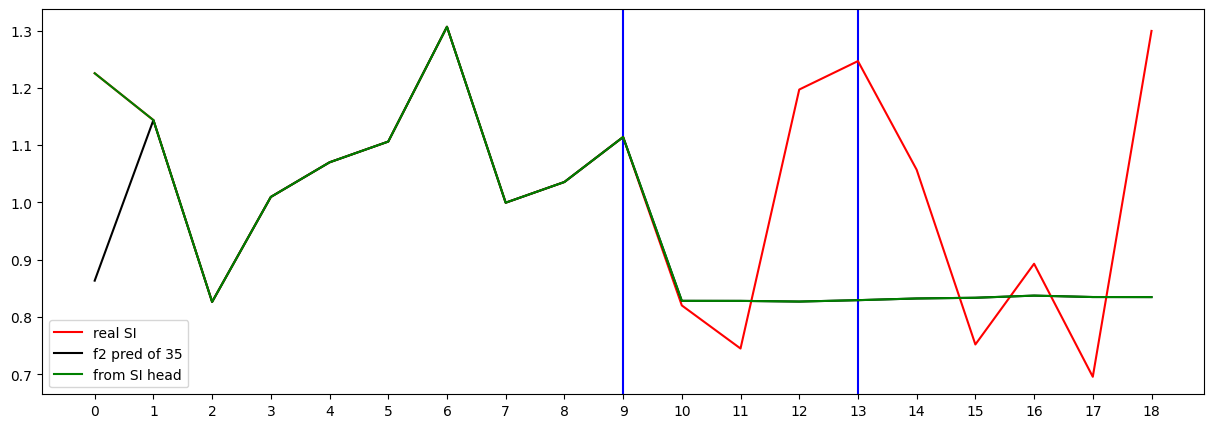

Testing R**2 - (all) - (no inputs):  0.9325641663195406
Testing R**2 - (f2) - SI full (no inputs):  -0.6281606293879893
Testing R**2 - SI head only (no inputs):  -0.6281606293879893
0 ...index R**2 (no inputs):  -0.015463113143895146
1 ...index R**2 (no inputs):  -0.11954304170833097
2 ...index R**2 (no inputs):  -0.6281606293879893
3 ...index R**2 (no inputs):  -9.536290549066724
4 ...index R**2 (no inputs):  -4.7662082761120566
5 ...index R**2 (no inputs):  -0.29805020656419234
6 ...index R**2 (no inputs):  -42.290202558676185
7 ...index R**2 (no inputs):  -26.85547373174839
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6016218486611888
10 ...index R**2 (no inputs):  -0.12086647459016908
11 ...index R**2 (no inputs):  -741.8604860008074
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.5905747905657837
16 ...index R**2 (no inputs):  -0.08540782950455084
17 ...index R**2 (no i

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to500_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to500.append( res_real )
all_pred_si_100to500.append( res_pred )


[0] Train Loss: 1.203337
Loss_SI: 1.2301026582717896 Loss_all: 1.2327138185501099
===


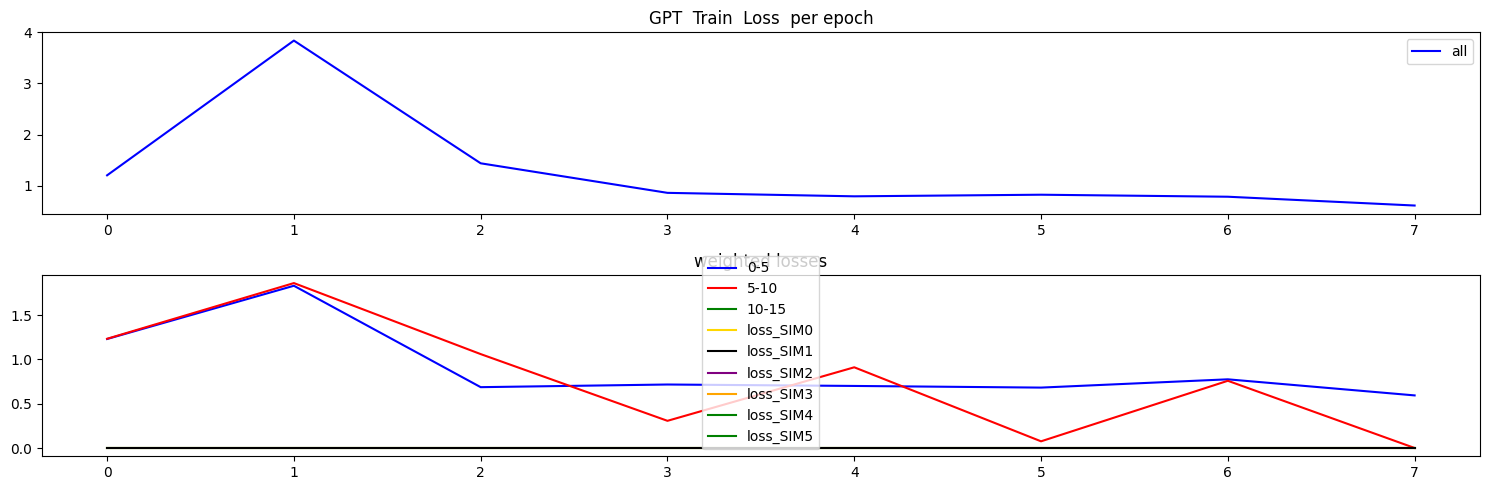

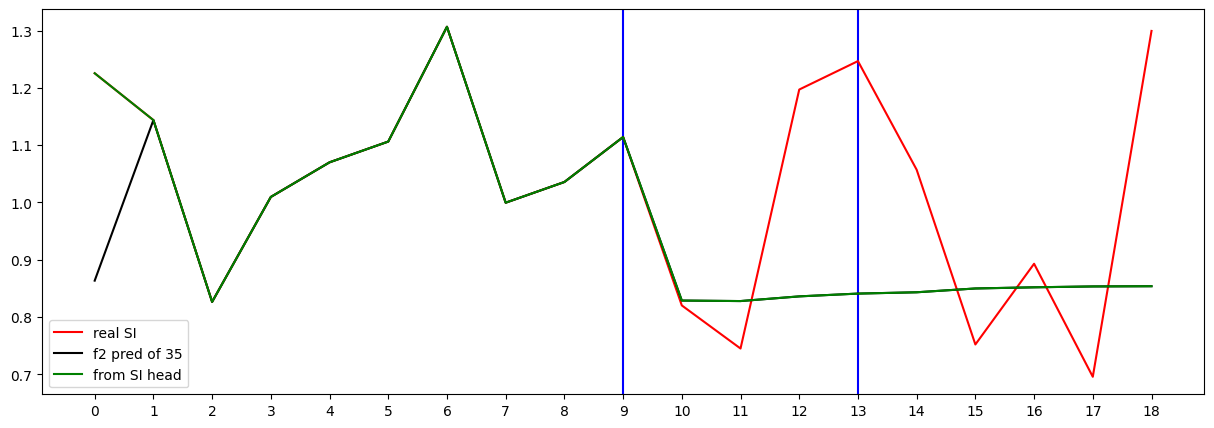

Testing R**2 - (all) - (no inputs):  0.9276755749473646
Testing R**2 - (f2) - SI full (no inputs):  -0.5454464940147545
Testing R**2 - SI head only (no inputs):  -0.5454464940147545
0 ...index R**2 (no inputs):  -0.0042214616487346035
1 ...index R**2 (no inputs):  0.0018433434655872327
2 ...index R**2 (no inputs):  -0.5454464940147545
3 ...index R**2 (no inputs):  -15.508220526676563
4 ...index R**2 (no inputs):  -5.11859254212267
5 ...index R**2 (no inputs):  -0.18948085349794597
6 ...index R**2 (no inputs):  -439.60024182766574
7 ...index R**2 (no inputs):  -0.9941864650919605
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9527050514392008
10 ...index R**2 (no inputs):  -0.13553421480087202
11 ...index R**2 (no inputs):  -502.92146716087296
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.9115032365364857
16 ...index R**2 (no inputs):  -0.04756083378077536
17 ...index R**2 (n

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to500_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )


## Run 5


In [49]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.177179
Loss_SI: 1.2392133474349976 Loss_all: 1.2064118385314941
===


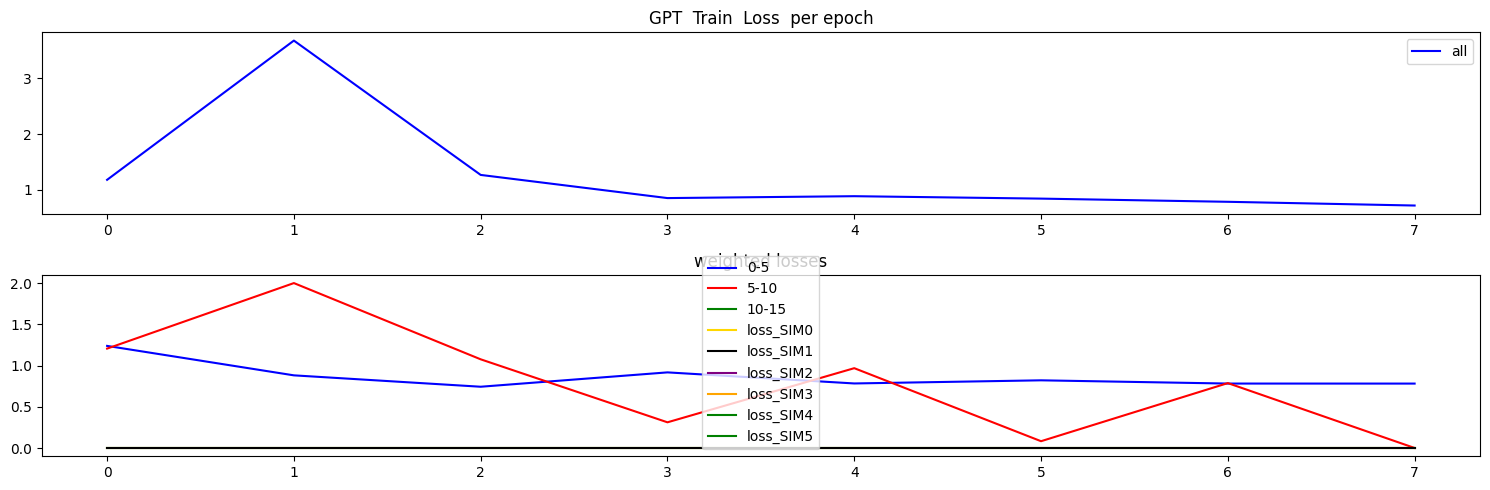

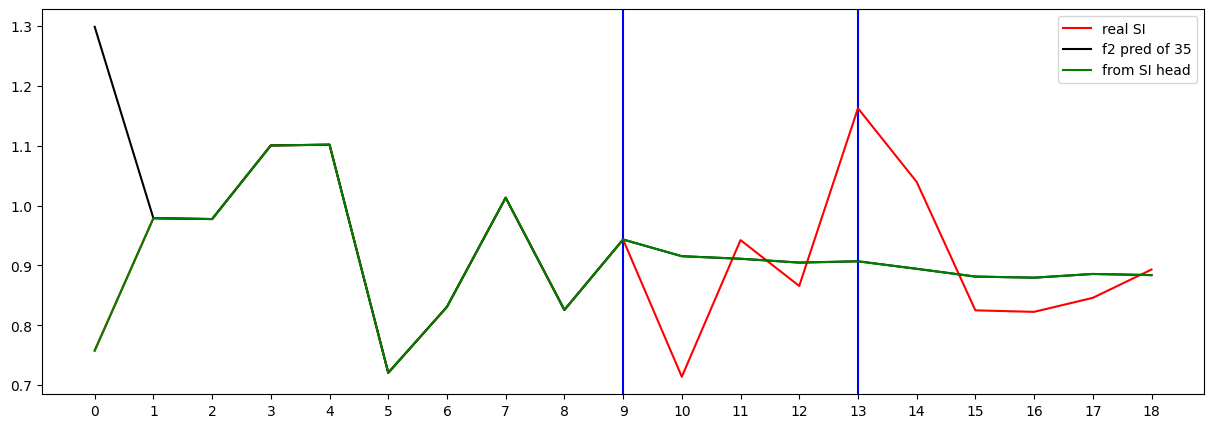

Testing R**2 - (all) - (no inputs):  0.9527047543944925
Testing R**2 - (f2) - SI full (no inputs):  0.10864831011276488
Testing R**2 - SI head only (no inputs):  0.10864831011276488
0 ...index R**2 (no inputs):  -0.026558700052583983
1 ...index R**2 (no inputs):  -0.046556400986772495
2 ...index R**2 (no inputs):  0.10864831011276488
3 ...index R**2 (no inputs):  -0.8736514282167023
4 ...index R**2 (no inputs):  -0.07341408106433933
5 ...index R**2 (no inputs):  -2.425663622765357
6 ...index R**2 (no inputs):  -626.0840905457387
7 ...index R**2 (no inputs):  -8.210275670488741
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.06805448016351567
10 ...index R**2 (no inputs):  -0.21357115713599462
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.13915342602373326
16 ...index R**2 (no inputs):  -0.1782824171589863
17 ...index R**2 (no inputs):  -430.

In [50]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk400to500_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_400to500.append( res_real )
all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.208413
Loss_SI: 1.231871485710144 Loss_all: 1.2713299989700317
===


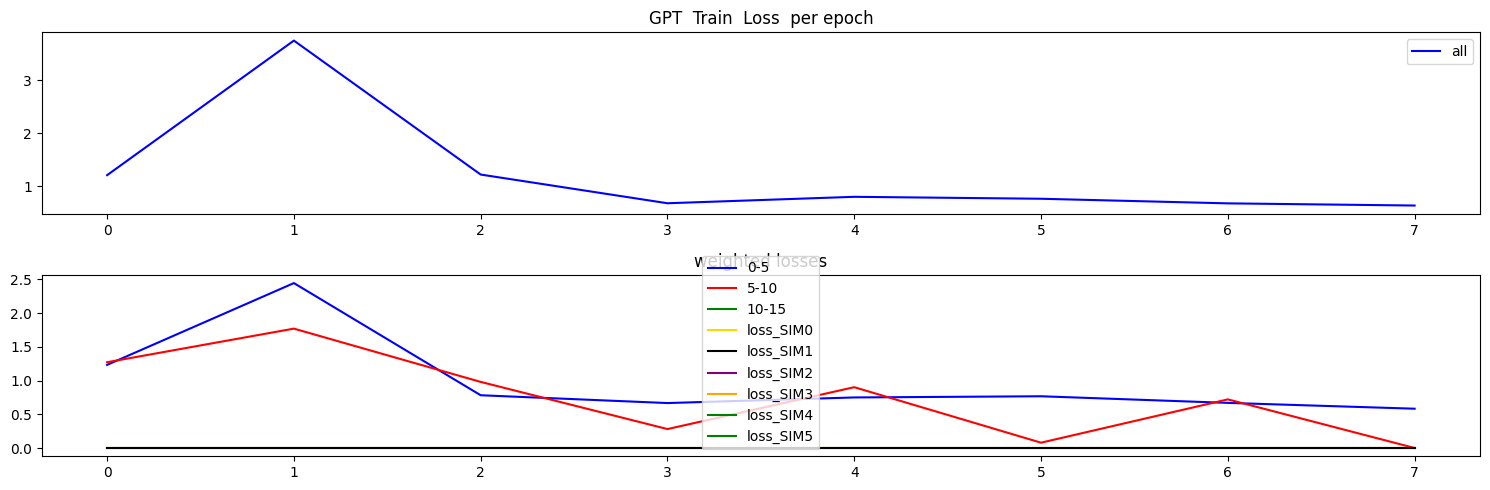

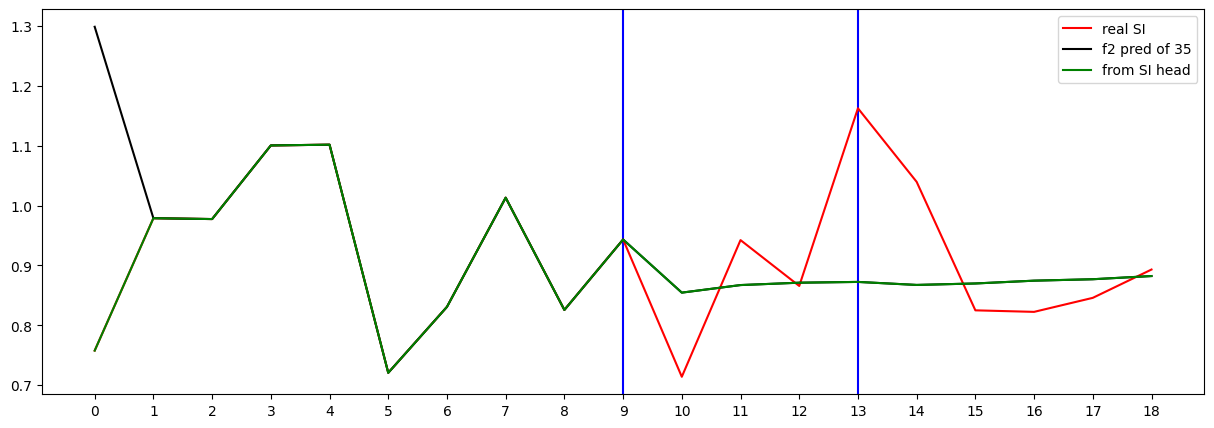

Testing R**2 - (all) - (no inputs):  0.9721751713210746
Testing R**2 - (f2) - SI full (no inputs):  -0.12128058068410041
Testing R**2 - SI head only (no inputs):  -0.12128058068410041
0 ...index R**2 (no inputs):  -0.058927553781288555
1 ...index R**2 (no inputs):  -1.0238922029866133
2 ...index R**2 (no inputs):  -0.12128058068410041
3 ...index R**2 (no inputs):  -0.6558818315070989
4 ...index R**2 (no inputs):  -249.95992654307008
5 ...index R**2 (no inputs):  -1.001393965210195
6 ...index R**2 (no inputs):  -1477.1667566277438
7 ...index R**2 (no inputs):  -1235.2296294546104
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.01810113585058737
10 ...index R**2 (no inputs):  -0.0934143180599789
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2976128396759252
16 ...index R**2 (no inputs):  -0.0205533062715344
17 ...index R**2 (no inputs):  -1128

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to500_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to500.append( res_real )
all_pred_si_300to500.append( res_pred )


[0] Train Loss: 1.407095
Loss_SI: 1.462791919708252 Loss_all: 1.320257306098938
===


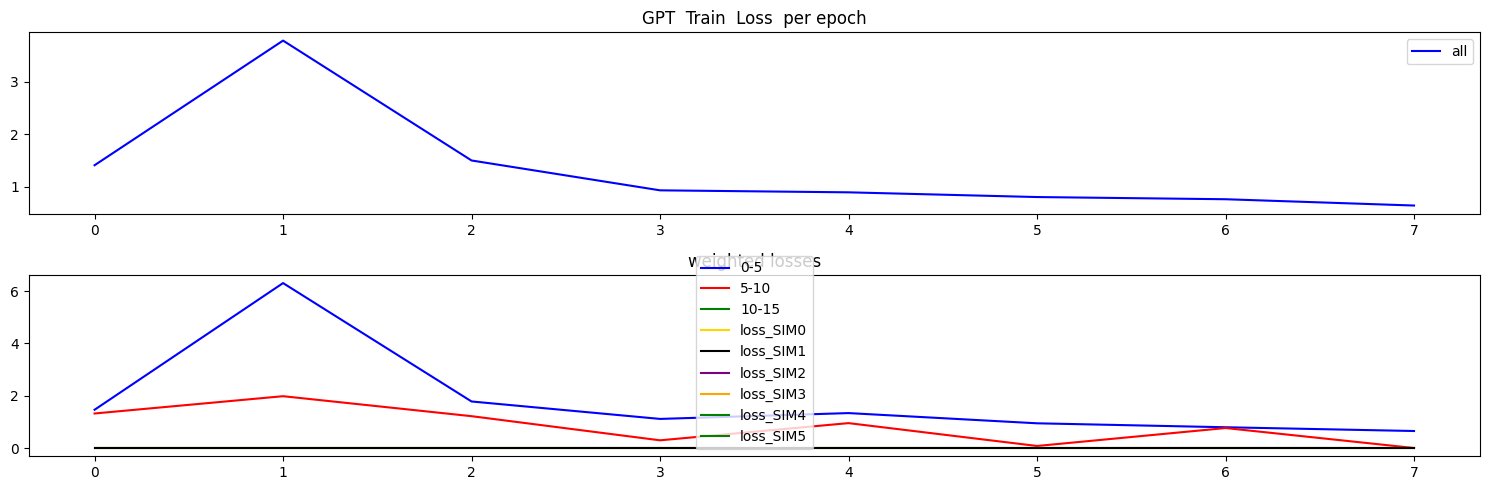

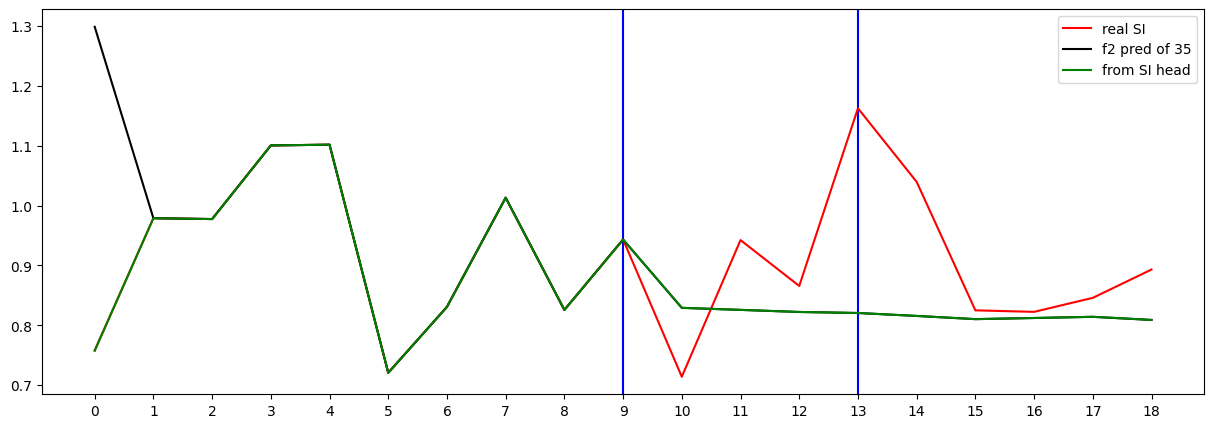

Testing R**2 - (all) - (no inputs):  0.9649150317269796
Testing R**2 - (f2) - SI full (no inputs):  -0.4963197947179516
Testing R**2 - SI head only (no inputs):  -0.4963197947179516
0 ...index R**2 (no inputs):  -0.07910093080060632
1 ...index R**2 (no inputs):  0.0017640354253505297
2 ...index R**2 (no inputs):  -0.4963197947179516
3 ...index R**2 (no inputs):  -0.4962203969238994
4 ...index R**2 (no inputs):  -598.0882539321804
5 ...index R**2 (no inputs):  -1.4500131163833099
6 ...index R**2 (no inputs):  -1382.6122525363778
7 ...index R**2 (no inputs):  -77992.23333681656
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.004770125077646403
10 ...index R**2 (no inputs):  0.001652619417975898
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6537492713276083
16 ...index R**2 (no inputs):  -0.5237671651923124
17 ...index R**2 (no inputs):  -10581

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to500_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to500.append( res_real )
all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.334666
Loss_SI: 1.2677671909332275 Loss_all: 1.3289932012557983
===


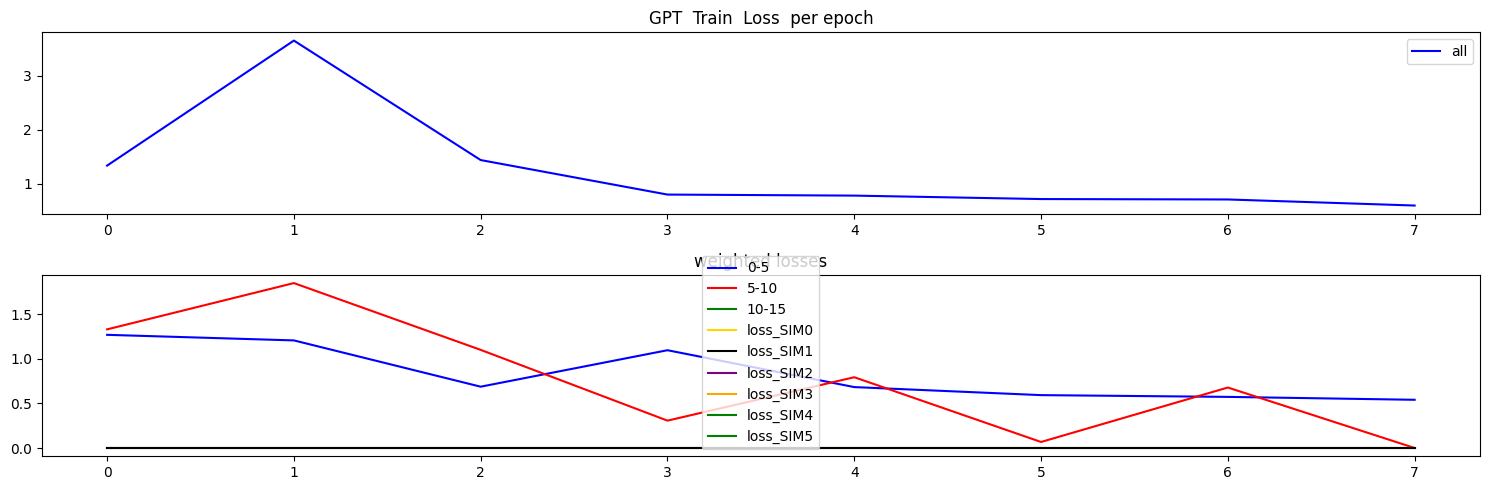

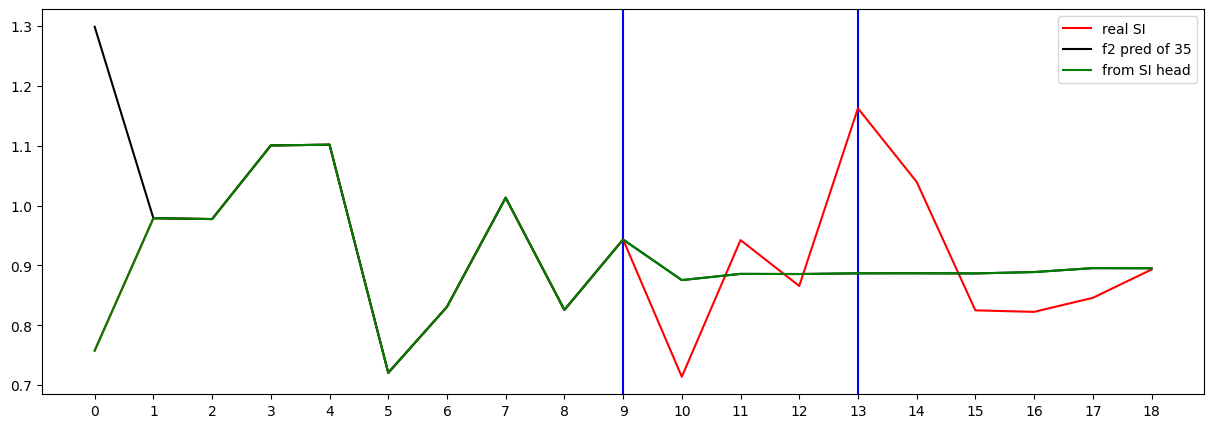

Testing R**2 - (all) - (no inputs):  0.9854584001813712
Testing R**2 - (f2) - SI full (no inputs):  -0.0610661262762513
Testing R**2 - SI head only (no inputs):  -0.0610661262762513
0 ...index R**2 (no inputs):  -0.05707436183236192
1 ...index R**2 (no inputs):  -0.13358349850892193
2 ...index R**2 (no inputs):  -0.0610661262762513
3 ...index R**2 (no inputs):  -0.017622510739590425
4 ...index R**2 (no inputs):  -1872.0565762754863
5 ...index R**2 (no inputs):  -0.042584562427565587
6 ...index R**2 (no inputs):  -1846.3323231903641
7 ...index R**2 (no inputs):  -94998.99323348147
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.00020205273341455943
10 ...index R**2 (no inputs):  0.009164227769265731
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7895978034315951
16 ...index R**2 (no inputs):  -0.6436806951465557
17 ...index R**2 (no inputs):  -

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to500_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to500.append( res_real )
all_pred_si_100to500.append( res_pred )


[0] Train Loss: 1.394717
Loss_SI: 1.2837437391281128 Loss_all: 1.3331793546676636
===


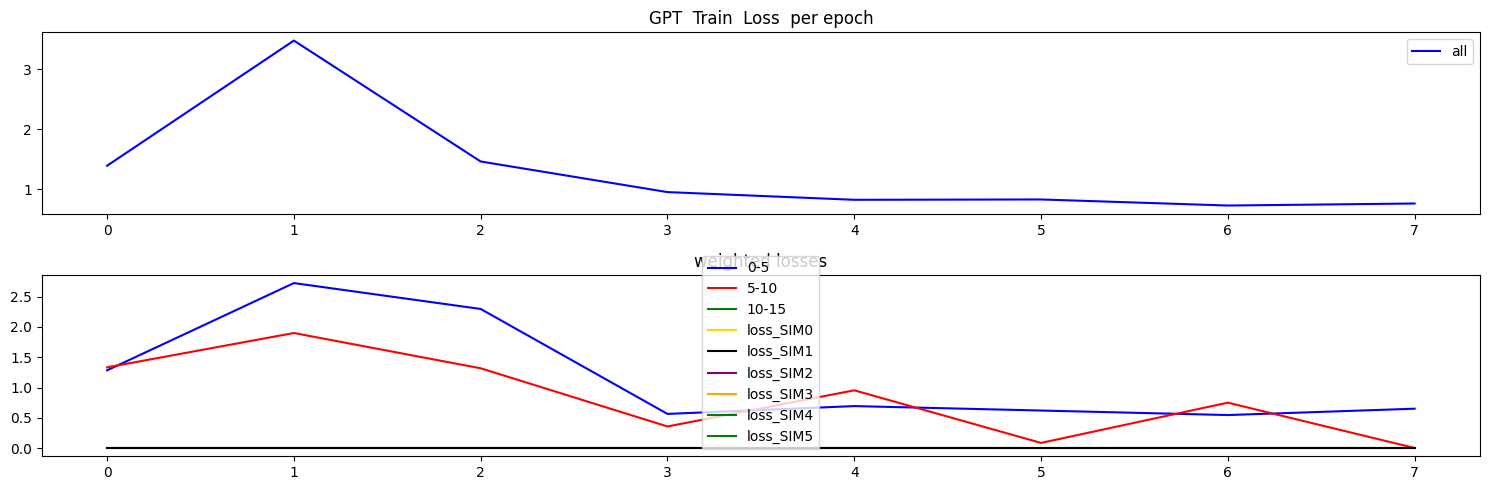

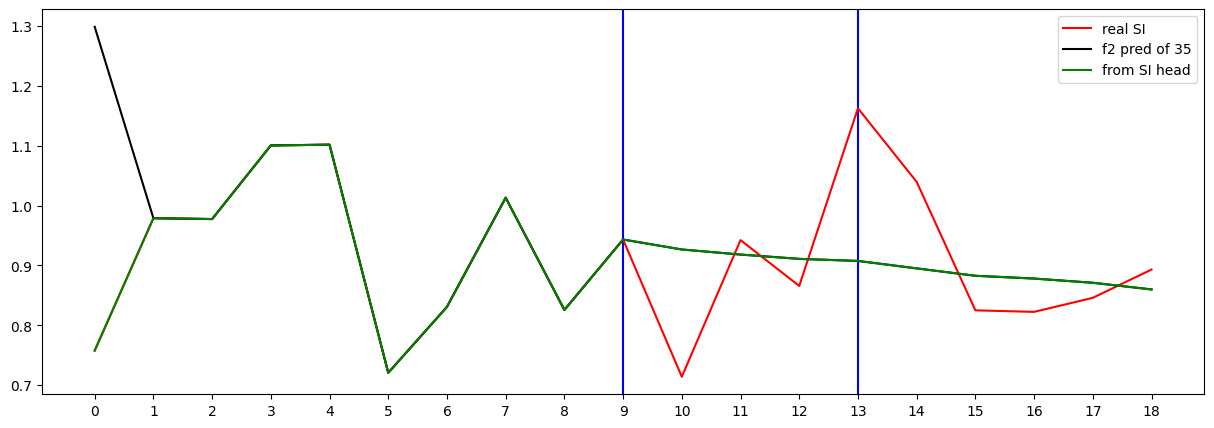

Testing R**2 - (all) - (no inputs):  0.9175866938171993
Testing R**2 - (f2) - SI full (no inputs):  0.1720626486275848
Testing R**2 - SI head only (no inputs):  0.1720626486275848
0 ...index R**2 (no inputs):  -0.03357025689524873
1 ...index R**2 (no inputs):  -1.135814566420735
2 ...index R**2 (no inputs):  0.1720626486275848
3 ...index R**2 (no inputs):  -0.2200492109001153
4 ...index R**2 (no inputs):  -833.0432783690353
5 ...index R**2 (no inputs):  -1.4203958593391333
6 ...index R**2 (no inputs):  -2409.647334126617
7 ...index R**2 (no inputs):  -106153.17749777924
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.012120894237424684
10 ...index R**2 (no inputs):  -0.14481929090677514
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.36302597515306734
16 ...index R**2 (no inputs):  -0.41372931911952215
17 ...index R**2 (no inputs):  -412228.09

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to500_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )



## Run 6


In [55]:


chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.239490
Loss_SI: 1.3665138483047485 Loss_all: 1.183938980102539
===


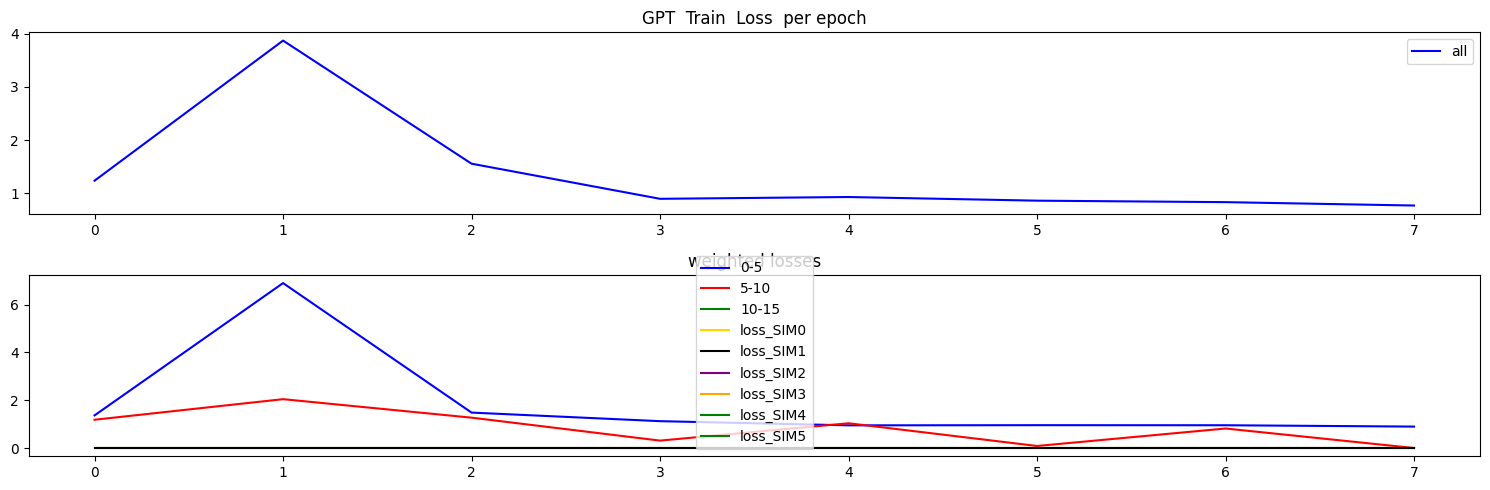

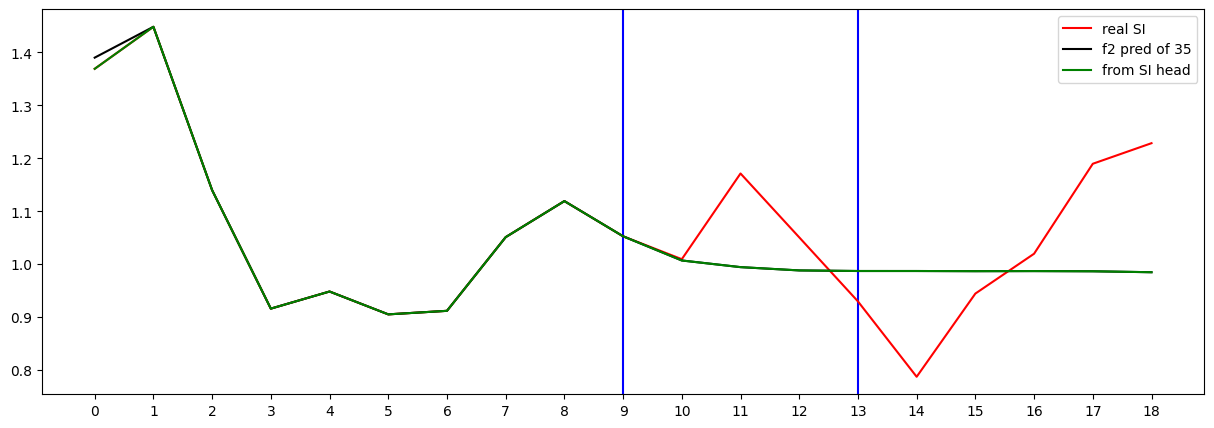

Testing R**2 - (all) - (no inputs):  0.9784298619623455
Testing R**2 - (f2) - SI full (no inputs):  -0.25954293414433627
Testing R**2 - SI head only (no inputs):  -0.25954293414433627
0 ...index R**2 (no inputs):  -0.31033353346737
1 ...index R**2 (no inputs):  -0.031433221223399865
2 ...index R**2 (no inputs):  -0.25954293414433627
3 ...index R**2 (no inputs):  -5503.455630775023
4 ...index R**2 (no inputs):  -1.4602323764178502
5 ...index R**2 (no inputs):  -4.59433496611115
6 ...index R**2 (no inputs):  -68.71131630141227
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0008464335440461213
10 ...index R**2 (no inputs):  -0.12131367157511064
11 ...index R**2 (no inputs):  -186.27604428430874
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.7333699480925917
16 ...index R**2 (no inputs):  -1.0438614500304948
17 ...index R**2 (no inputs):  -302.50

In [56]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk400to500_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_400to500.append( res_real )
all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.194661
Loss_SI: 1.3332411050796509 Loss_all: 1.1612730026245117
===


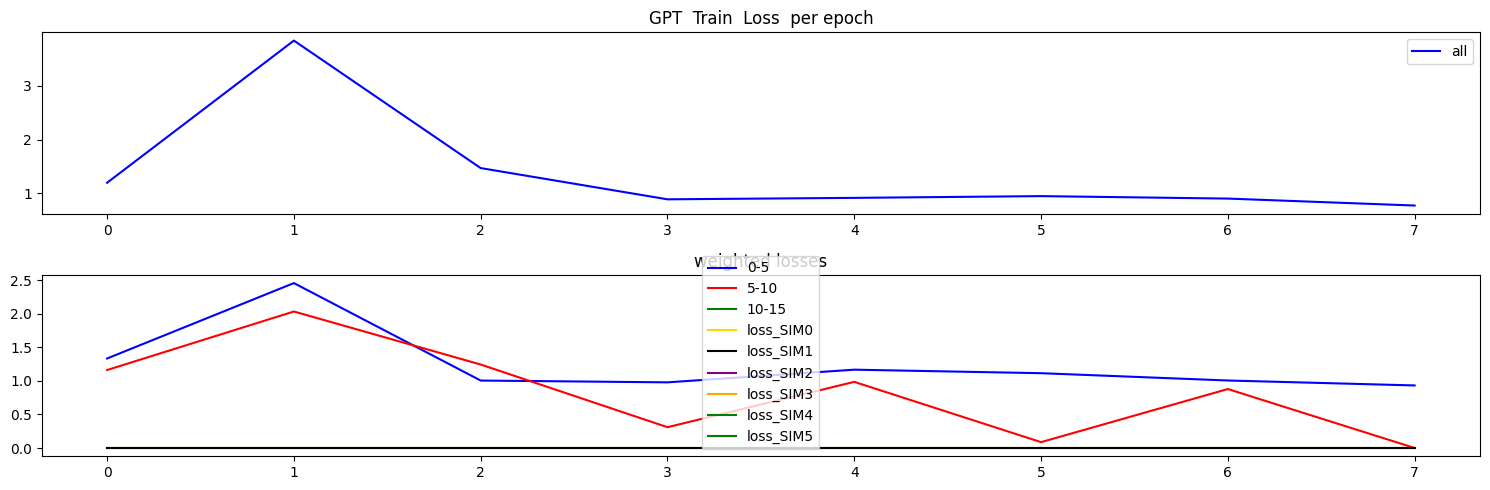

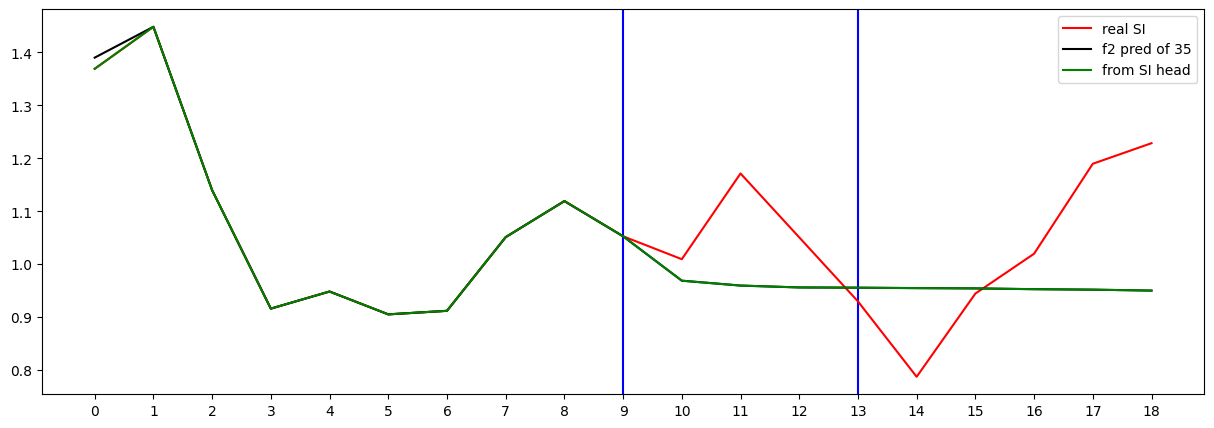

Testing R**2 - (all) - (no inputs):  0.9711600625626562
Testing R**2 - (f2) - SI full (no inputs):  -0.520934623485992
Testing R**2 - SI head only (no inputs):  -0.520934623485992
0 ...index R**2 (no inputs):  0.0049241247307266756
1 ...index R**2 (no inputs):  -0.09948018272103609
2 ...index R**2 (no inputs):  -0.520934623485992
3 ...index R**2 (no inputs):  -6491.276354341656
4 ...index R**2 (no inputs):  -0.2146016036194982
5 ...index R**2 (no inputs):  -6.542749464651991
6 ...index R**2 (no inputs):  -33.04313598463342
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05024824994486066
10 ...index R**2 (no inputs):  -0.13827109734723253
11 ...index R**2 (no inputs):  -1259.4933737914375
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.659931091925627
16 ...index R**2 (no inputs):  -2.364264613740637
17 ...index R**2 (no inputs):  -1540.1214066

In [57]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to500_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to500.append( res_real )
all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.281462
Loss_SI: 1.3615431785583496 Loss_all: 1.2302868366241455
===


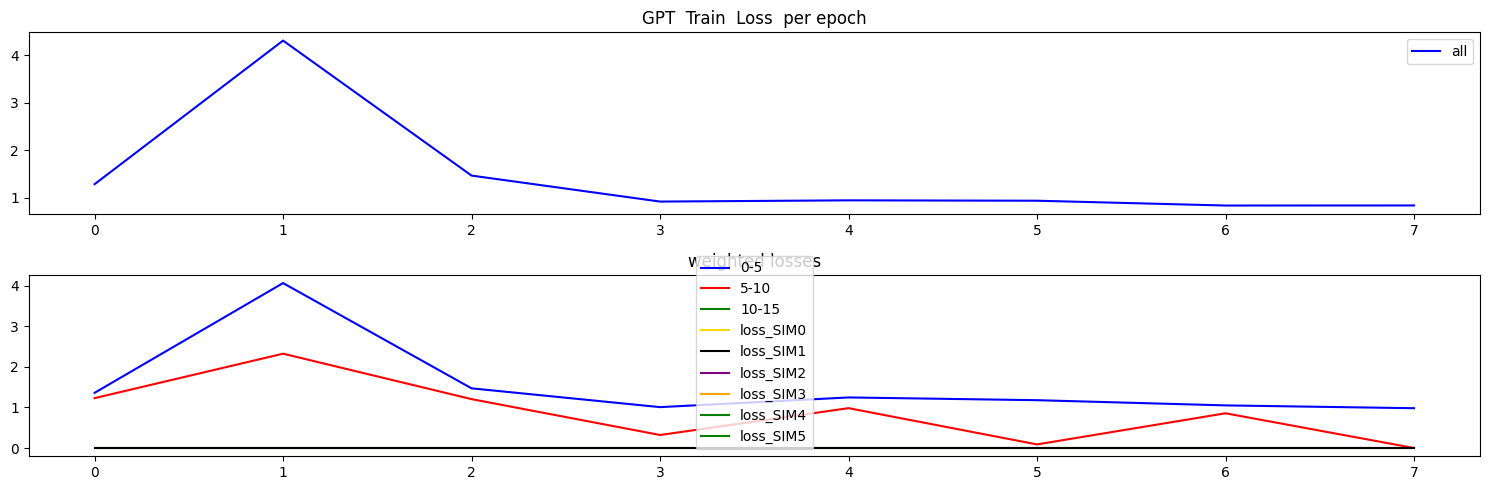

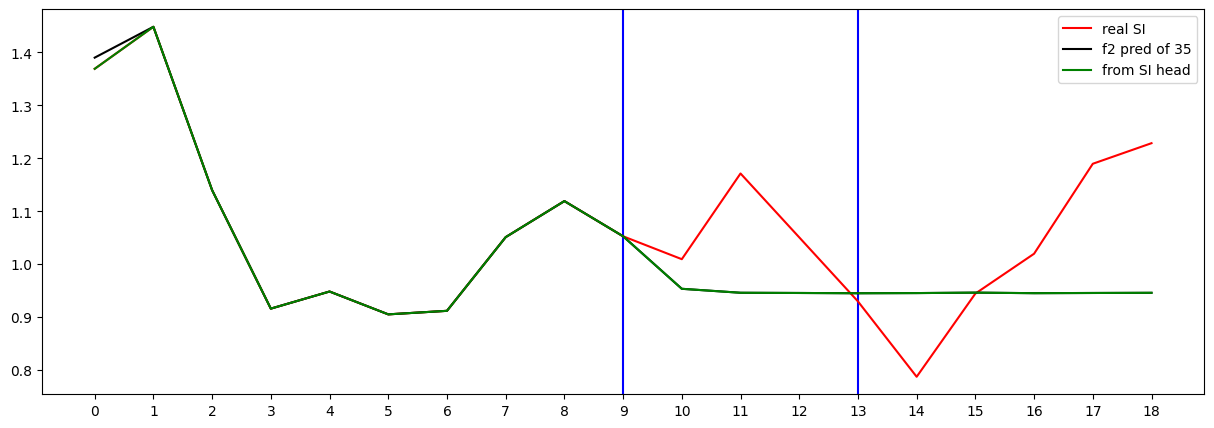

Testing R**2 - (all) - (no inputs):  0.9714028539143221
Testing R**2 - (f2) - SI full (no inputs):  -0.5867387362433556
Testing R**2 - SI head only (no inputs):  -0.5867387362433556
0 ...index R**2 (no inputs):  -0.10712395682607312
1 ...index R**2 (no inputs):  -0.04399396703031577
2 ...index R**2 (no inputs):  -0.5867387362433556
3 ...index R**2 (no inputs):  -5974.144315584374
4 ...index R**2 (no inputs):  -1.2088375937832878
5 ...index R**2 (no inputs):  -6.447252662366659
6 ...index R**2 (no inputs):  -28.265554110148184
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.025047731918630856
10 ...index R**2 (no inputs):  -0.1048513453715727
11 ...index R**2 (no inputs):  -1302.1329512208204
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.6707342553515288
16 ...index R**2 (no inputs):  -1.599032548478513
17 ...index R**2 (no inputs):  -2450.477

In [58]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to500_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to500.append( res_real )
all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.181579
Loss_SI: 1.2230688333511353 Loss_all: 1.266787052154541
===


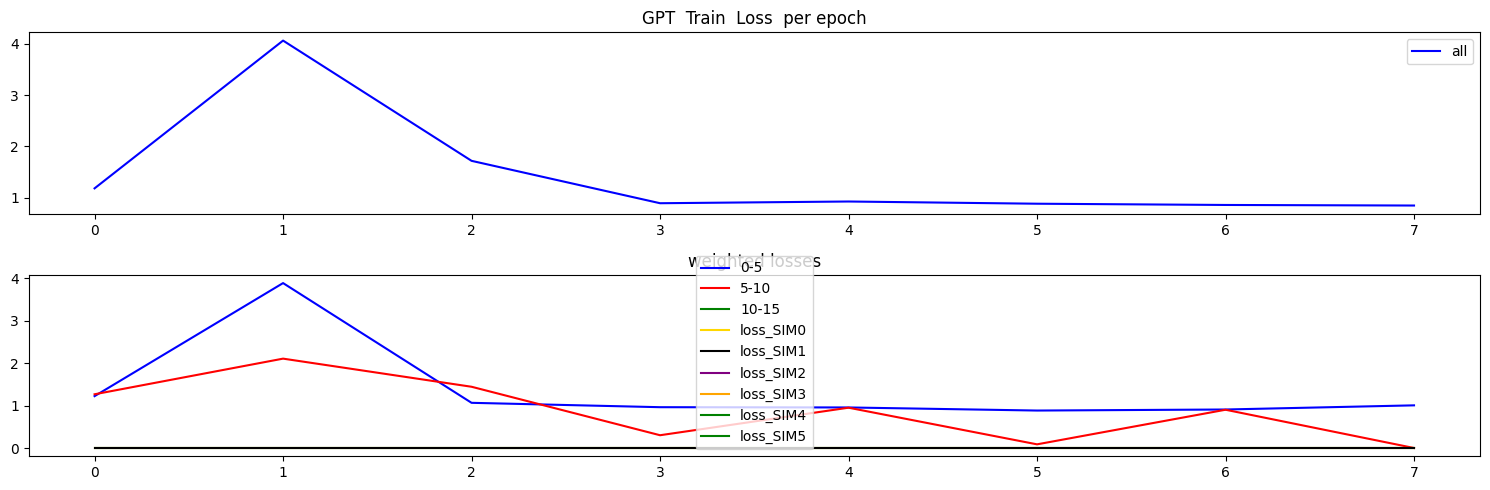

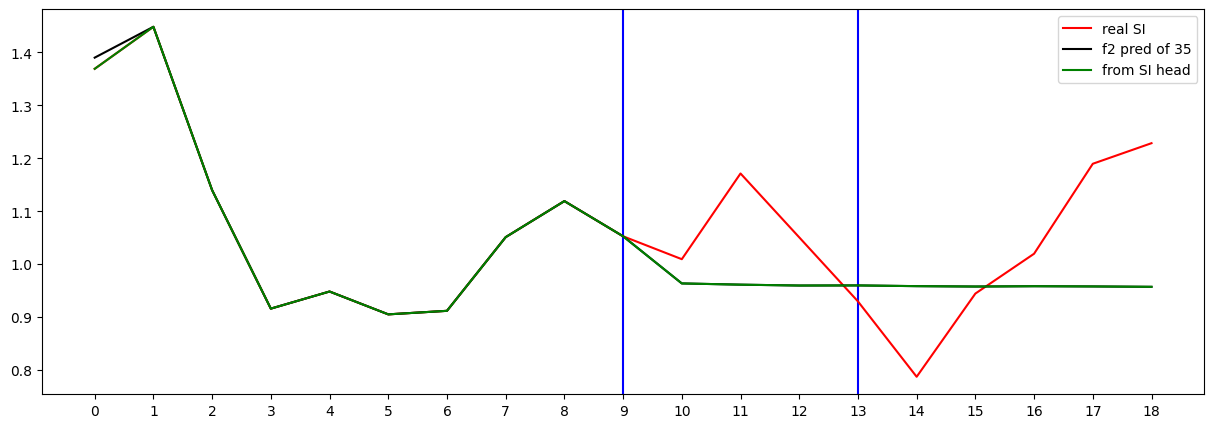

Testing R**2 - (all) - (no inputs):  0.9677054850215313
Testing R**2 - (f2) - SI full (no inputs):  -0.48687729403686975
Testing R**2 - SI head only (no inputs):  -0.48687729403686975
0 ...index R**2 (no inputs):  0.0009839680616360313
1 ...index R**2 (no inputs):  -0.16355676693936072
2 ...index R**2 (no inputs):  -0.48687729403686975
3 ...index R**2 (no inputs):  -4214.319146261543
4 ...index R**2 (no inputs):  -0.1039205786788242
5 ...index R**2 (no inputs):  -7.454639292699898
6 ...index R**2 (no inputs):  -12.685759992270949
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.014478664814084441
10 ...index R**2 (no inputs):  -0.053993902872089716
11 ...index R**2 (no inputs):  -920.9933285584985
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.012364055670398
16 ...index R**2 (no inputs):  -2.520121550983455
17 ...index R**2 (no inputs):  -2279

In [59]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to500_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to500.append( res_real )
all_pred_si_100to500.append( res_pred )



[0] Train Loss: 1.297789
Loss_SI: 1.309693694114685 Loss_all: 1.3071023225784302
===


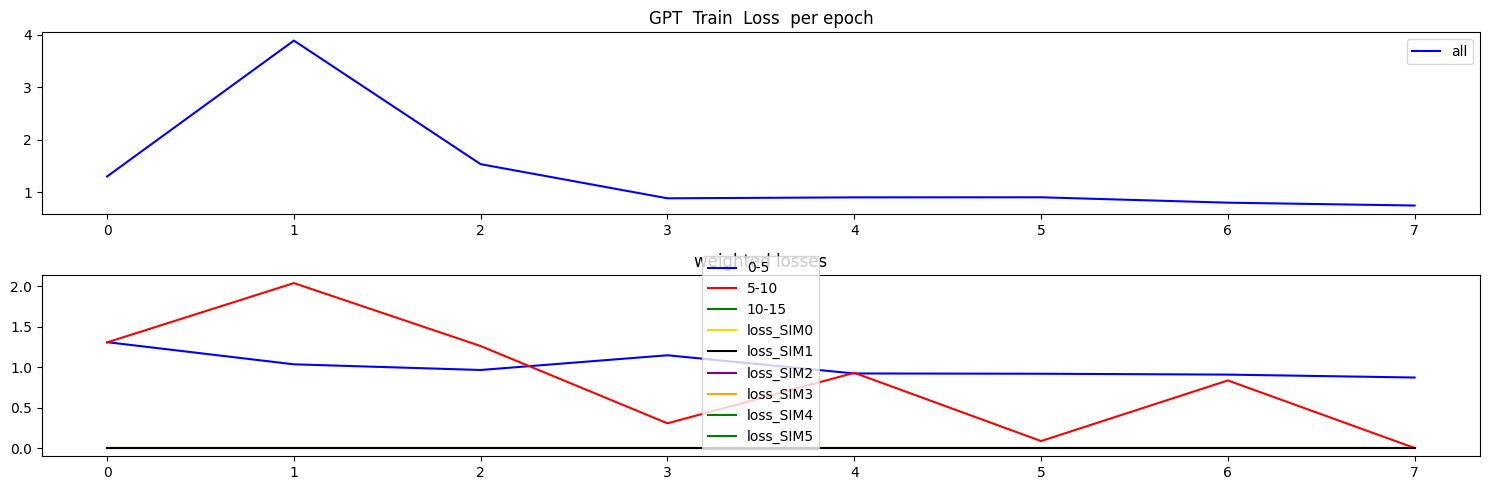

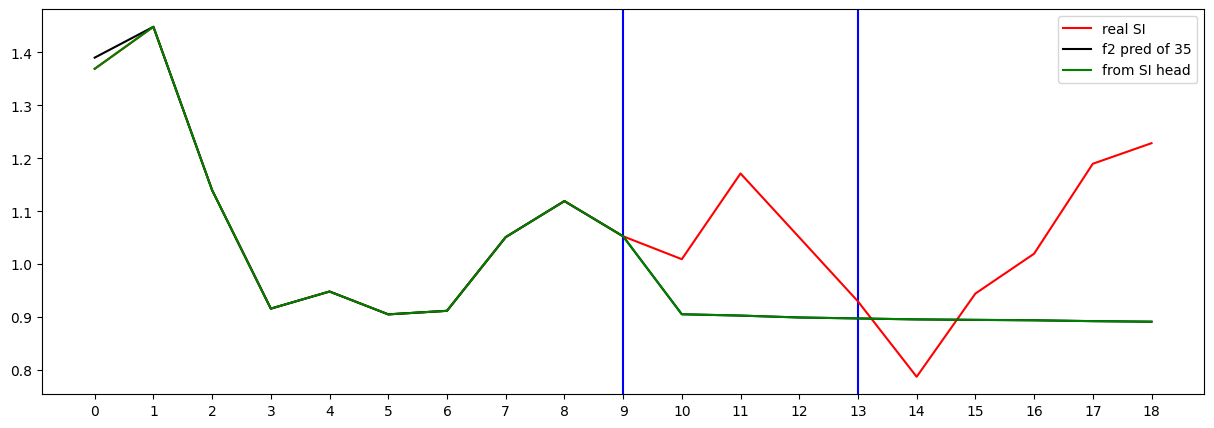

Testing R**2 - (all) - (no inputs):  0.985665613285549
Testing R**2 - (f2) - SI full (no inputs):  -1.1486859740269093
Testing R**2 - SI head only (no inputs):  -1.1486859740269093
0 ...index R**2 (no inputs):  -0.09442484779952776
1 ...index R**2 (no inputs):  -0.05139745146633112
2 ...index R**2 (no inputs):  -1.1486859740269093
3 ...index R**2 (no inputs):  -5623.334701545428
4 ...index R**2 (no inputs):  -17.80372924074509
5 ...index R**2 (no inputs):  -2.5739683137516307
6 ...index R**2 (no inputs):  -13.275761595887886
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.025872729678684037
10 ...index R**2 (no inputs):  -0.21497915604283024
11 ...index R**2 (no inputs):  -448.55781353402557
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.167397792104815
16 ...index R**2 (no inputs):  -1.2781798418785342
17 ...index R**2 (no inputs):  -1890.321

In [60]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to500_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to500.append( res_real )
all_pred_si_000to500.append( res_pred )



## R2 over accumulated Runs


In [61]:

from sklearn.metrics import r2_score

real_si_concat_400to500 = np.concatenate(all_real_si_400to500)
pred_si_concat_400to500 = np.concatenate(all_pred_si_400to500)


real_si_concat_300to500 = np.concatenate(all_real_si_300to500)
pred_si_concat_300to500 = np.concatenate(all_pred_si_300to500)

real_si_concat_200to500 = np.concatenate(all_real_si_200to500)
pred_si_concat_200to500 = np.concatenate(all_pred_si_200to500)

real_si_concat_100to500 = np.concatenate(all_real_si_100to500)
pred_si_concat_100to500 = np.concatenate(all_pred_si_100to500)

real_si_concat_000to500 = np.concatenate(all_real_si_000to500)
pred_si_concat_000to500 = np.concatenate(all_pred_si_000to500)


In [62]:

r2 = r2_score(real_si_concat_400to500, pred_si_concat_400to500 )

print("Accumulated R² 400to500:", r2)


Accumulated R² 400to500: 0.40783989209651483


In [63]:


r2 = r2_score(real_si_concat_300to500, pred_si_concat_300to500 )

print("Accumulated R² 300to500:", r2)


Accumulated R² 300to500: 0.05373928153739804


In [64]:

r2 = r2_score(real_si_concat_200to500, pred_si_concat_200to500 )

print("Accumulated R² 200to500:", r2)


Accumulated R² 200to500: -0.22485989524937677


In [65]:

r2 = r2_score(real_si_concat_100to500, pred_si_concat_100to500 )

print("Accumulated R² 100to500:", r2)


Accumulated R² 100to500: -0.6075432341617437


In [66]:

r2 = r2_score(real_si_concat_000to500, pred_si_concat_000to500 )

print("Accumulated R² 000to500:", r2)


Accumulated R² 000to500: -0.0726196444998286



## First Few R2


In [67]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [68]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [69]:

print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 1 )
print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 2 )
print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 3 )
print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 4 )
print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 5 )
print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 6 )
print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 7 )
print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 8 )
print_first_few_R2( real_si_concat_400to500, pred_si_concat_400to500, 9 )


1 .....................R² on first n steps - R²: 0.6164194761695898
Naive_R2:....................................R²: 0.7790
RMSE:0.1141,MAE:0.0890,MASE:0.3647
1 .......................R² on just step n - R²: 0.6164194761695898
Naive_R2:....................................R²: 0.7790
RMSE:0.1141,MAE:0.0890,MASE:0.3647
2 .....................R² on first n steps - R²: 0.42652070416237386
Naive_R2:....................................R²: 0.7056
RMSE:0.1236,MAE:0.0972,MASE:0.4703
2 .......................R² on just step n - R²: 0.02061407471337784
Naive_R2:....................................R²: 0.5907
RMSE:0.1323,MAE:0.1055,MASE:0.5502
3 .....................R² on first n steps - R²: 0.24468665865615458
Naive_R2:....................................R²: 0.4667
RMSE:0.1428,MAE:0.1111,MASE:0.7228
3 .......................R² on just step n - R²: -0.27462092348130795
Naive_R2:....................................R²: 0.2192
RMSE:0.1751,MAE:0.1387,MASE:0.7428
4 .....................R² on first n step

In [70]:

print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 1 )
print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 2 )
print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 3 )
print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 4 )
print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 5 )
print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 6 )
print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 7 )
print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 8 )
print_first_few_R2( real_si_concat_300to500, pred_si_concat_300to500, 9 )


1 .....................R² on first n steps - R²: 0.3387957176278492
Naive_R2:....................................R²: 0.6190
RMSE:0.1498,MAE:0.1370,MASE:0.5616
1 .......................R² on just step n - R²: 0.3387957176278492
Naive_R2:....................................R²: 0.6190
RMSE:0.1498,MAE:0.1370,MASE:0.5616
2 .....................R² on first n steps - R²: 0.0590880930494494
Naive_R2:....................................R²: 0.5170
RMSE:0.1583,MAE:0.1303,MASE:0.6302
2 .......................R² on just step n - R²: -0.5464101392747454
Naive_R2:....................................R²: 0.3537
RMSE:0.1663,MAE:0.1237,MASE:0.6449
3 .....................R² on first n steps - R²: -0.11986216970080088
Naive_R2:....................................R²: 0.2094
RMSE:0.1739,MAE:0.1382,MASE:0.8993
3 .......................R² on just step n - R²: -0.6891436795433472
Naive_R2:....................................R²: -0.0347
RMSE:0.2016,MAE:0.1539,MASE:0.8243
4 .....................R² on first n step

In [71]:

print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 1 )
print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 2 )
print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 3 )
print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 4 )
print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 5 )
print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 6 )
print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 7 )
print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 8 )
print_first_few_R2( real_si_concat_200to500, pred_si_concat_200to500, 9 )


1 .....................R² on first n steps - R²: 0.15791490512670758
Naive_R2:....................................R²: 0.5147
RMSE:0.1691,MAE:0.1492,MASE:0.6118
1 .......................R² on just step n - R²: 0.15791490512670758
Naive_R2:....................................R²: 0.5147
RMSE:0.1691,MAE:0.1492,MASE:0.6118
2 .....................R² on first n steps - R²: -0.25041183258946775
Naive_R2:....................................R²: 0.3581
RMSE:0.1825,MAE:0.1461,MASE:0.7067
2 .......................R² on just step n - R²: -1.1245769236263987
Naive_R2:....................................R²: 0.1121
RMSE:0.1949,MAE:0.1430,MASE:0.7458
3 .....................R² on first n steps - R²: -0.509782103158309
Naive_R2:....................................R²: -0.0659
RMSE:0.2019,MAE:0.1583,MASE:1.0304
3 .......................R² on just step n - R²: -1.3173752812583088
Naive_R2:....................................R²: -0.4195
RMSE:0.2361,MAE:0.1827,MASE:0.9785
4 .....................R² on first n s

In [72]:

print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 1 )
print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 2 )
print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 3 )
print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 4 )
print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 5 )
print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 6 )
print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 7 )
print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 8 )
print_first_few_R2( real_si_concat_100to500, pred_si_concat_100to500, 9 )



1 .....................R² on first n steps - R²: -0.07256422547333163
Naive_R2:....................................R²: 0.3819
RMSE:0.1908,MAE:0.1532,MASE:0.6280
1 .......................R² on just step n - R²: -0.07256422547333163
Naive_R2:....................................R²: 0.3819
RMSE:0.1908,MAE:0.1532,MASE:0.6280
2 .....................R² on first n steps - R²: -0.511080685560932
Naive_R2:....................................R²: 0.2242
RMSE:0.2006,MAE:0.1625,MASE:0.7857
2 .......................R² on just step n - R²: -1.4632103668345482
Naive_R2:....................................R²: -0.0294
RMSE:0.2099,MAE:0.1718,MASE:0.8957
3 .....................R² on first n steps - R²: -0.7205791067671732
Naive_R2:....................................R²: -0.2148
RMSE:0.2156,MAE:0.1772,MASE:1.1531
3 .......................R² on just step n - R²: -1.4503559376530943
Naive_R2:....................................R²: -0.5010
RMSE:0.2428,MAE:0.2066,MASE:1.1063
4 .....................R² on first n

In [73]:

print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 1 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 2 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 3 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 4 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 5 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 6 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 7 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 8 )
print_first_few_R2( real_si_concat_000to500, pred_si_concat_000to500, 9 )


1 .....................R² on first n steps - R²: 0.13570009885123613
Naive_R2:....................................R²: 0.5019
RMSE:0.1713,MAE:0.1333,MASE:0.5464
1 .......................R² on just step n - R²: 0.13570009885123613
Naive_R2:....................................R²: 0.5019
RMSE:0.1713,MAE:0.1333,MASE:0.5464
2 .....................R² on first n steps - R²: -0.07156947918682066
Naive_R2:....................................R²: 0.4499
RMSE:0.1689,MAE:0.1234,MASE:0.5969
2 .......................R² on just step n - R²: -0.5499266433473009
Naive_R2:....................................R²: 0.3522
RMSE:0.1665,MAE:0.1136,MASE:0.5925
3 .....................R² on first n steps - R²: -0.20176252850908205
Naive_R2:....................................R²: 0.1515
RMSE:0.1802,MAE:0.1287,MASE:0.8373
3 .......................R² on just step n - R²: -0.6757682733794907
Naive_R2:....................................R²: -0.0265
RMSE:0.2008,MAE:0.1391,MASE:0.7450
4 .....................R² on first n 


## Plot


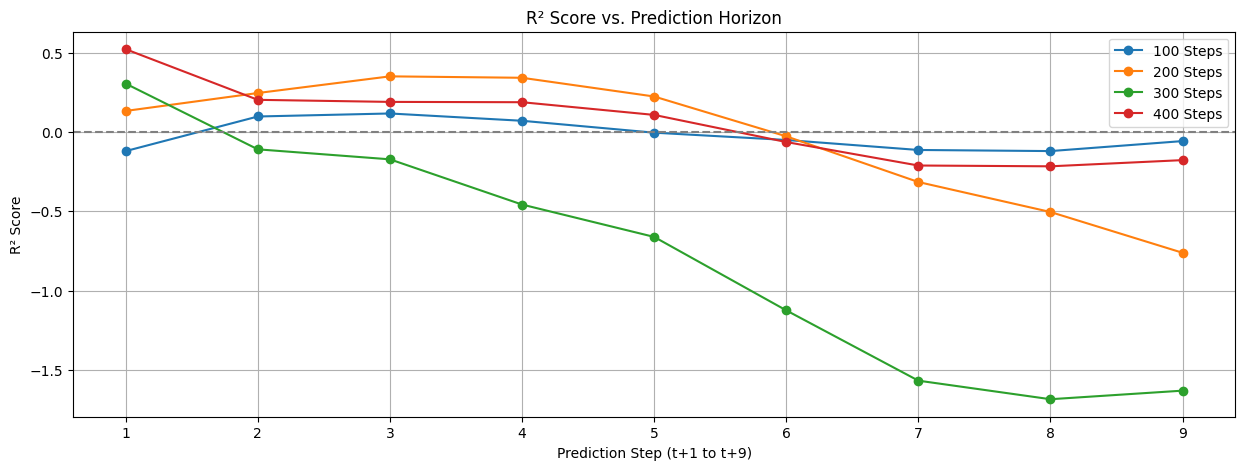

In [74]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
